# Problem Statement

Avocado is a fruit consumed by people heavily in the United States. 
Dataset - https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/avocado.csv.zip
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

# Importing Base Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import preprocessing

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

# Importing Dataset

In [2]:
df = pd.read_csv('avocado.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
#drop the unnamed column 0.. that doen't contain any useful info
df.drop(columns = 'Unnamed: 0',inplace = True)
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


# Disciptive Analysis

In [4]:
#lets first summarize the data
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

Description - 
- Date - The date of the observation
- AveragePrice - the average price of a single avocado
- type - conventional or organic
- year - the year
- Region - the city or region of the observation
- Total Volume - Total number of avocados sold
- 4046 - Total number of avocados with PLU 4046 sold
- 4225 - Total number of avocados with PLU 4225 sold
- 4770 - Total number of avocados with PLU 4770 sold

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


Observation - this data set has good amount of data to be interpreted, 
- no column have any missing data
- Type and region are of categorical data type
- rest all of the data contain float type numerical data except data which is of object data type and year which is of integer data type.

In [6]:
df.describe(include='all')

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
count,18249,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249,18249.000000,18249
unique,169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,54
top,2015-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,conventional,NaN,Albany
freq,108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9126,NaN,338
mean,NaN,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,NaN,2016.147899,NaN
std,NaN,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,NaN,0.939938,NaN
min,NaN,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,NaN,2015.000000,NaN
25%,NaN,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,NaN,2015.000000,NaN
50%,NaN,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,NaN,2016.000000,NaN
75%,NaN,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,NaN,2017.000000,NaN


Observation  - 
- There are 169 unique entries for dates, 108 data entries are captured on 27-12-2015, which is the highest
- There are two type conventional and organic - 9126 entries are of conventional type
- There are in total 54 regions and 338 entries are for albany region
- Rest of data is of numerical type and above results are showing mean, min, max, 25th, 50th, 75th percentile of all.

# Null Value Analysis

This analysis is to figure out if data contains any undefined or null value

In [7]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

Observation - There is no null data in dataset

# Zero Value Analysis

In [8]:
(df==0).sum()

Date                0
AveragePrice        0
Total Volume        0
4046              242
4225               61
4770             5497
Total Bags         15
Small Bags        159
Large Bags       2370
XLarge Bags     12048
type                0
year                0
region              0
dtype: int64

Observation - some of the columns have zero  like total bags, small bags, large bags, xl bags, avoacdo quality type, but 0 in these columns won't distort the results. So won't impute the zeros 

# Drop Duplicate Data

In [9]:
#lets drop the duplicate rows if any
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.9+ MB


Observation - There is no duplicate data in data set

# Interpreting Relationship between Features and Target Variable

We need to analyse this data set wrt to two targets ie Average Price and Region. Lets first analyse the target Variables.

1) Analysing type

In [10]:
df['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

<AxesSubplot:xlabel='type', ylabel='count'>

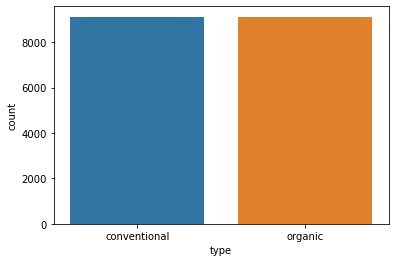

In [11]:
sns.countplot(df['type']) #plotting the count for each unique entry under target variable

2) Analysing Region

In [12]:
df['region'].value_counts()

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

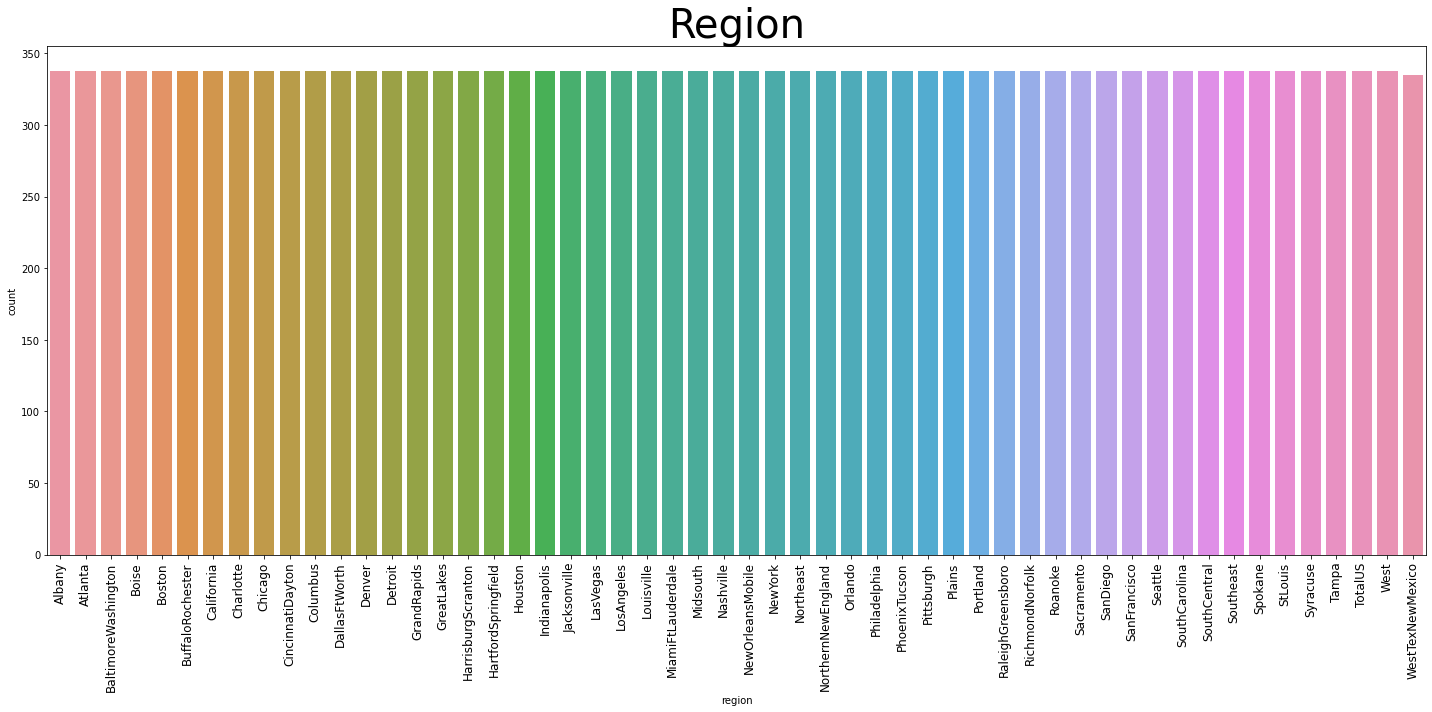

In [13]:
plt.figure(figsize = (20,10),)
sns.countplot(df['region'])
plt.xticks(rotation = 90, size = 12)
plt.title('Region', fontsize=40)
plt.tight_layout()

Observation  - data is almost balanced for all regions

# Analysing Relation between Feature variables and Region as Target 

In [14]:
plt.figure(figsize = (20,10),)
sns.barplot(x = 'region', y = 'Total Volume', data = df)
plt.xticks(rotation = 90, size = 12)
plt.title('Volume vs Region', fontsize=25)
plt.tight_layout()

Error in callback <function flush_figures at 0x000001CF049645E0> (for post_execute):


KeyboardInterrupt: 

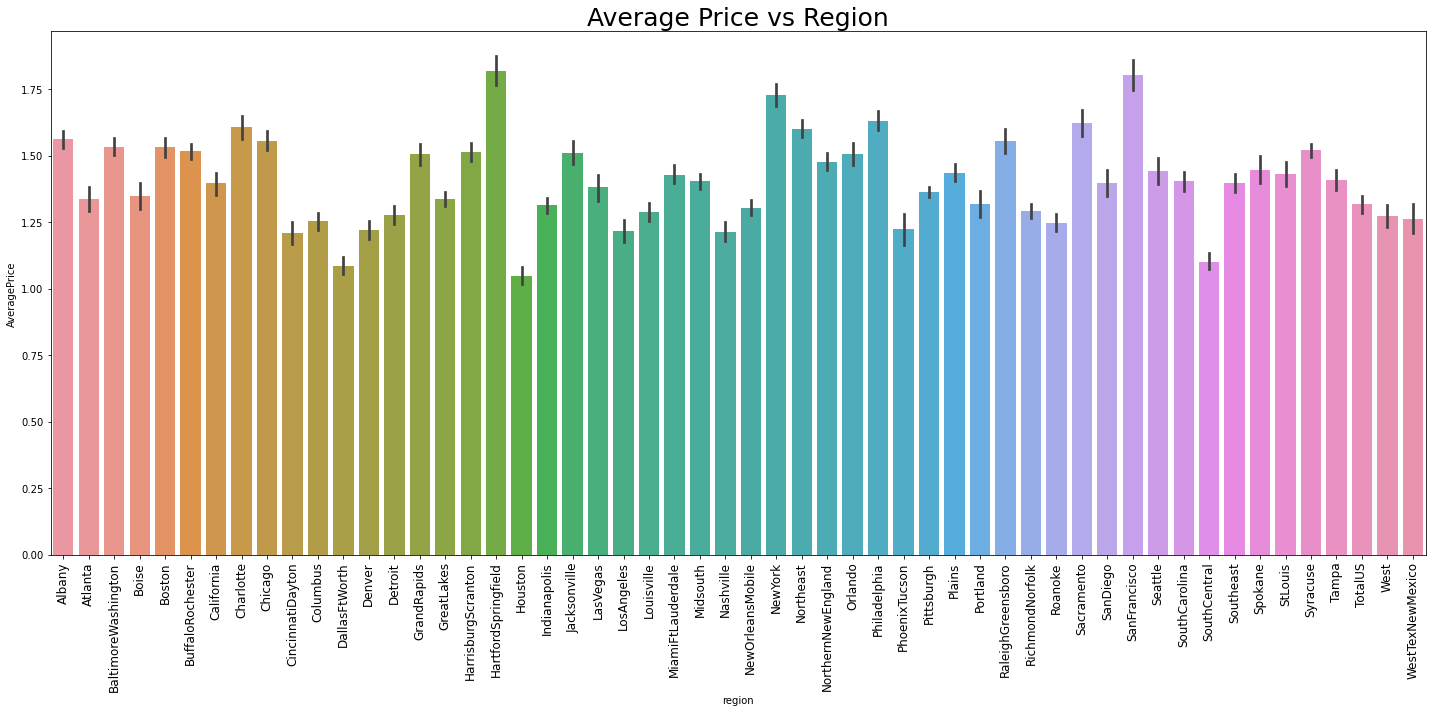

In [15]:
plt.figure(figsize = (20,10),)
sns.barplot(x = 'region', y = 'AveragePrice', data = df)
plt.xticks(rotation = 90, size = 12)
plt.title('Average Price vs Region', fontsize=25)
plt.tight_layout()

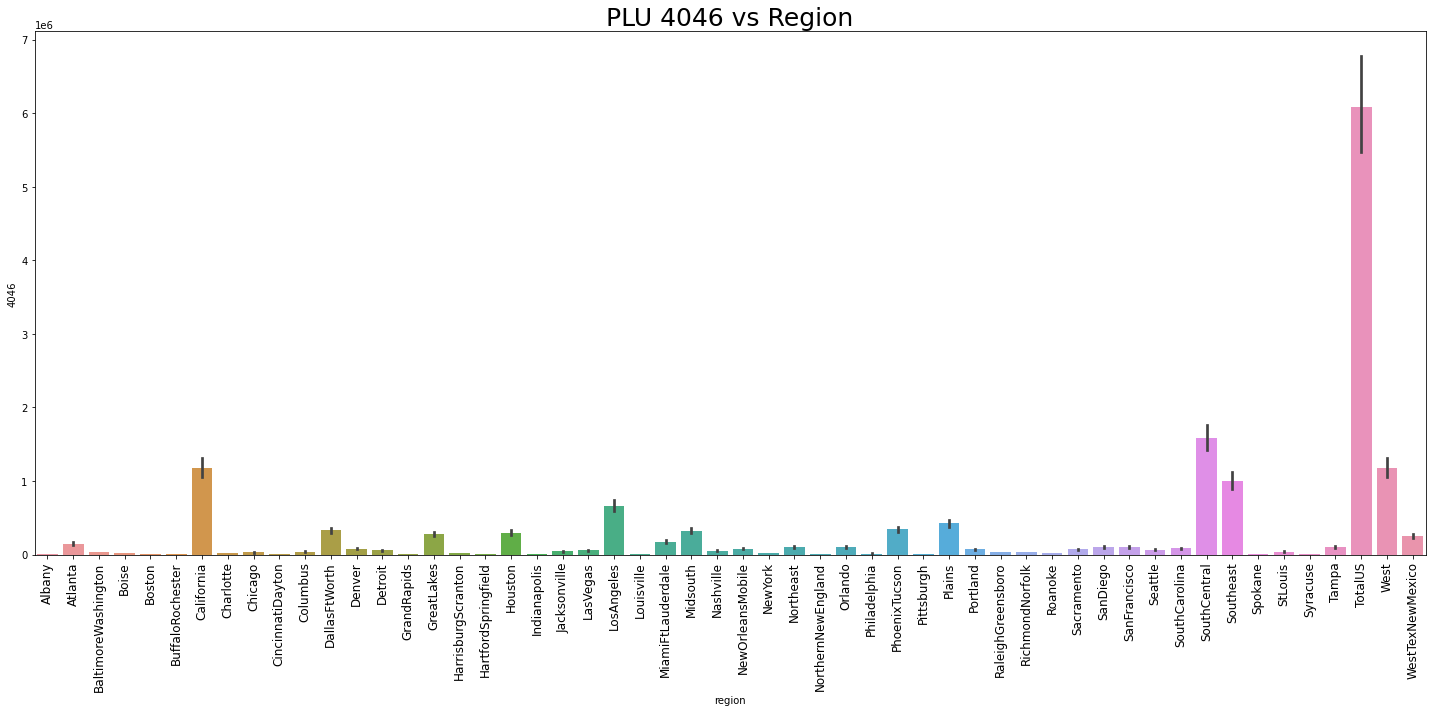

In [16]:
plt.figure(figsize = (20,10),)
sns.barplot(x = 'region', y = '4046', data = df)
plt.xticks(rotation = 90, size = 12)
plt.title('PLU 4046 vs Region', fontsize=25)
plt.tight_layout()

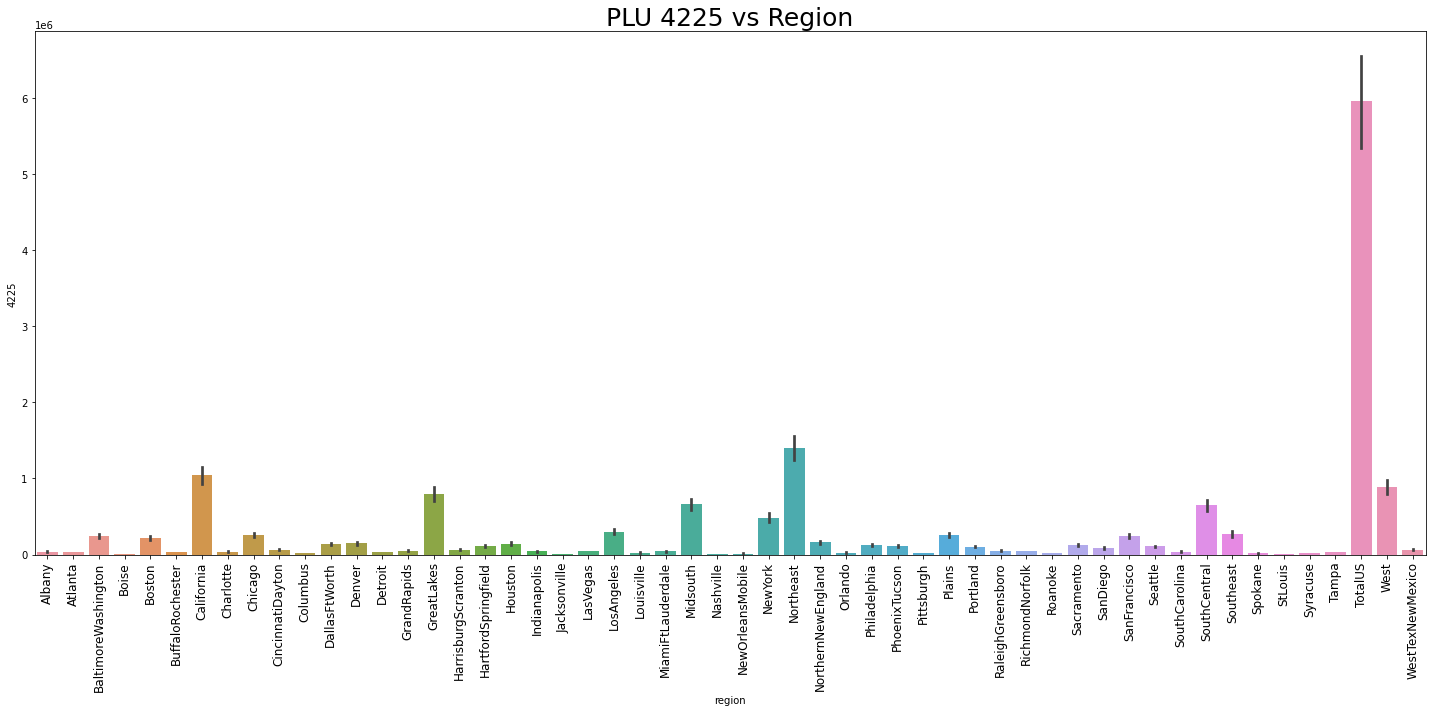

In [17]:
plt.figure(figsize = (20,10),)
sns.barplot(x = 'region', y = '4225', data = df)
plt.xticks(rotation = 90, size = 12)
plt.title('PLU 4225 vs Region', fontsize=25)
plt.tight_layout()

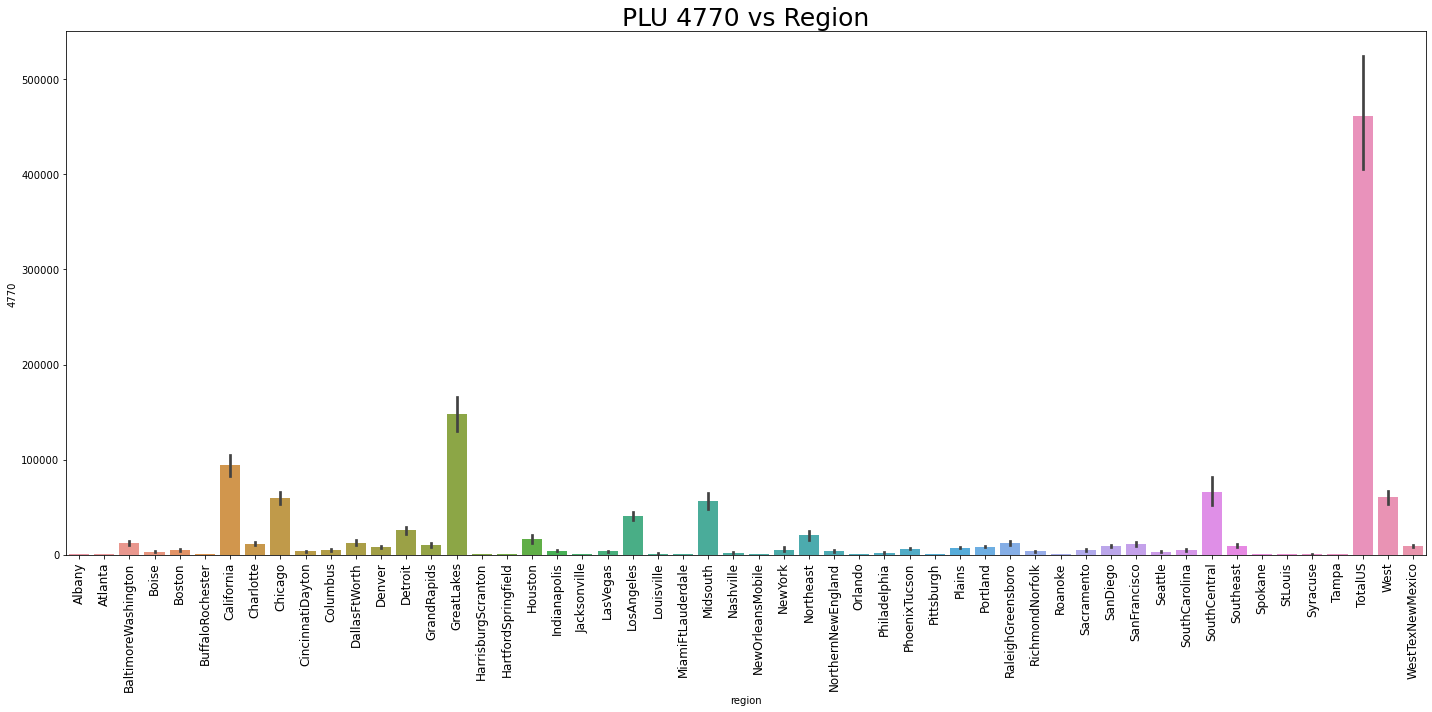

In [18]:
plt.figure(figsize = (20,10),)
sns.barplot(x = 'region', y = '4770', data = df)
plt.xticks(rotation = 90, size = 12)
plt.title('PLU 4770 vs Region', fontsize=25)
plt.tight_layout()

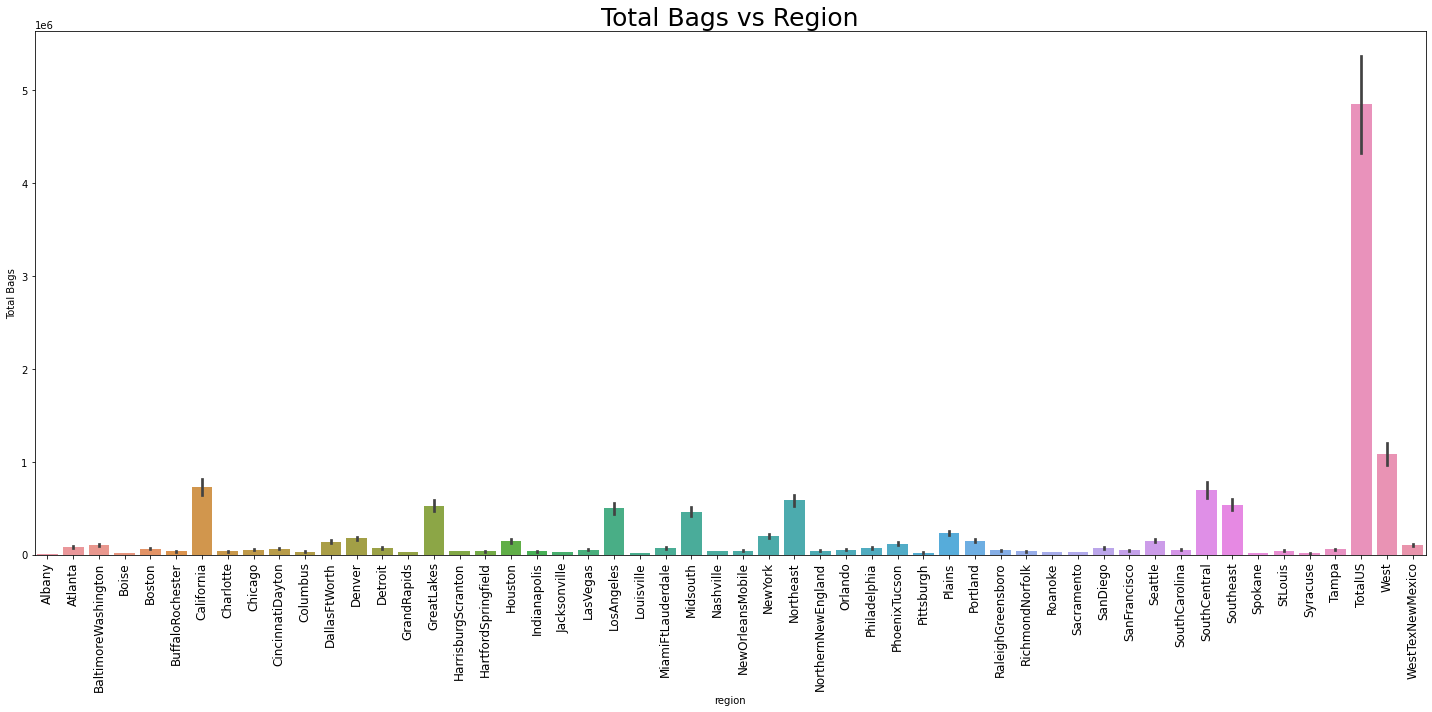

In [19]:
plt.figure(figsize = (20,10),)
sns.barplot(x = 'region', y = 'Total Bags', data = df)
plt.xticks(rotation = 90, size = 12)
plt.title('Total Bags vs Region', fontsize=25)
plt.tight_layout()

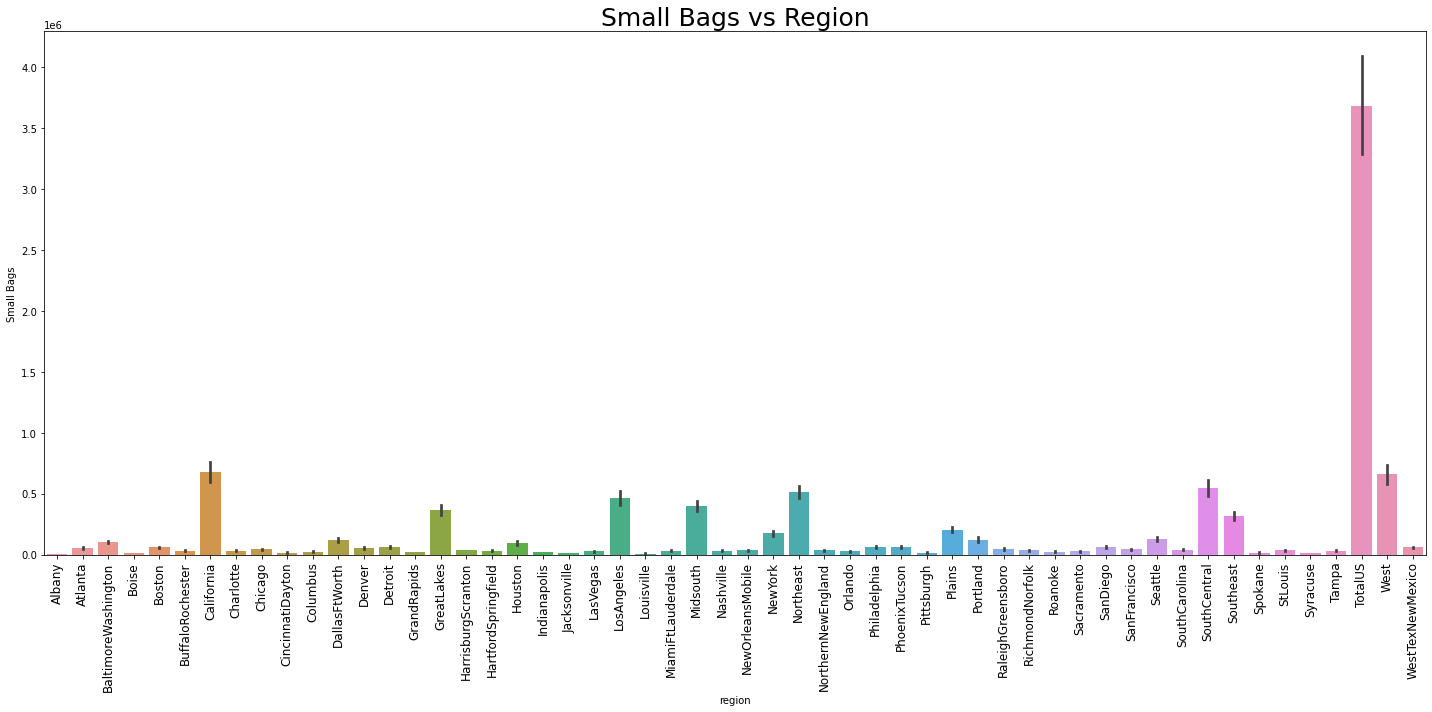

In [20]:
plt.figure(figsize = (20,10),)
sns.barplot(x = 'region', y = 'Small Bags', data = df)
plt.xticks(rotation = 90, size = 12)
plt.title('Small Bags vs Region', fontsize=25)
plt.tight_layout()

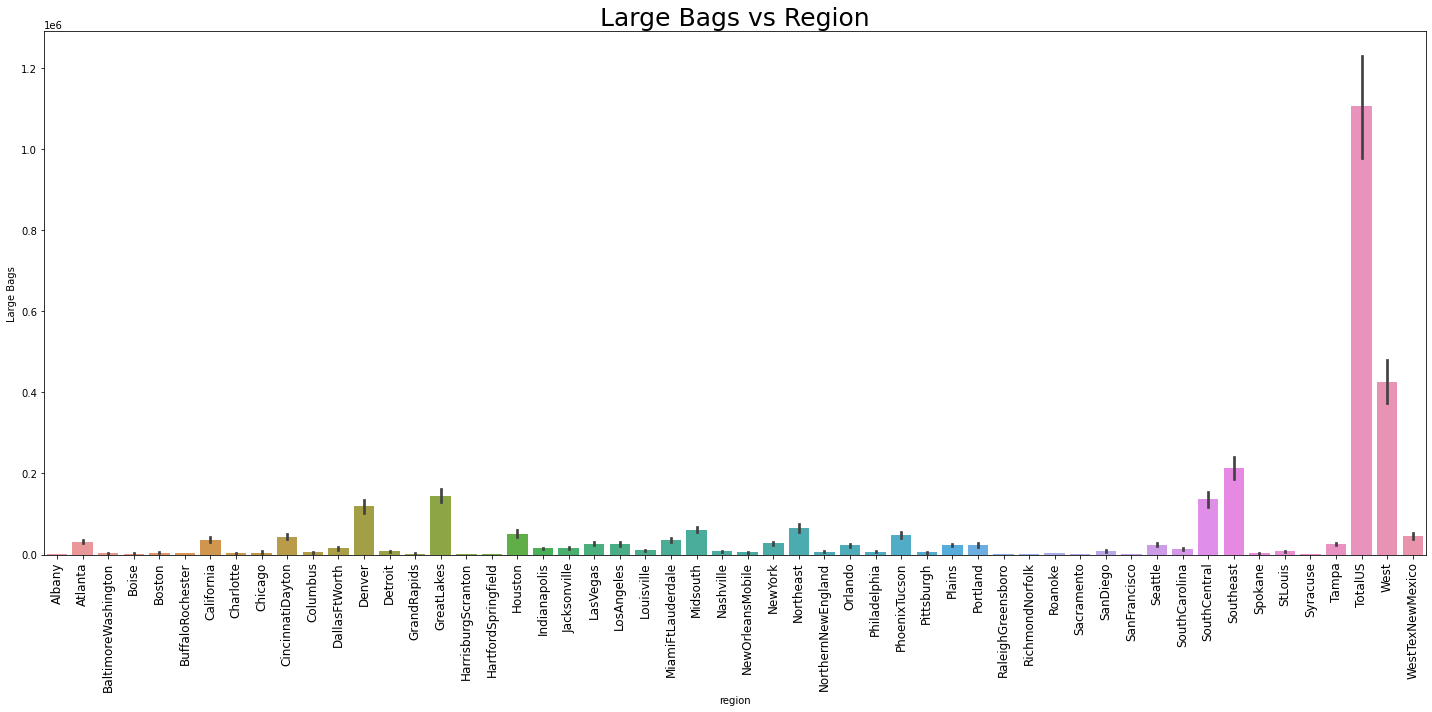

In [21]:
plt.figure(figsize = (20,10),)
sns.barplot(x = 'region', y = 'Large Bags', data = df)
plt.xticks(rotation = 90, size = 12)
plt.title('Large Bags vs Region', fontsize=25)
plt.tight_layout()

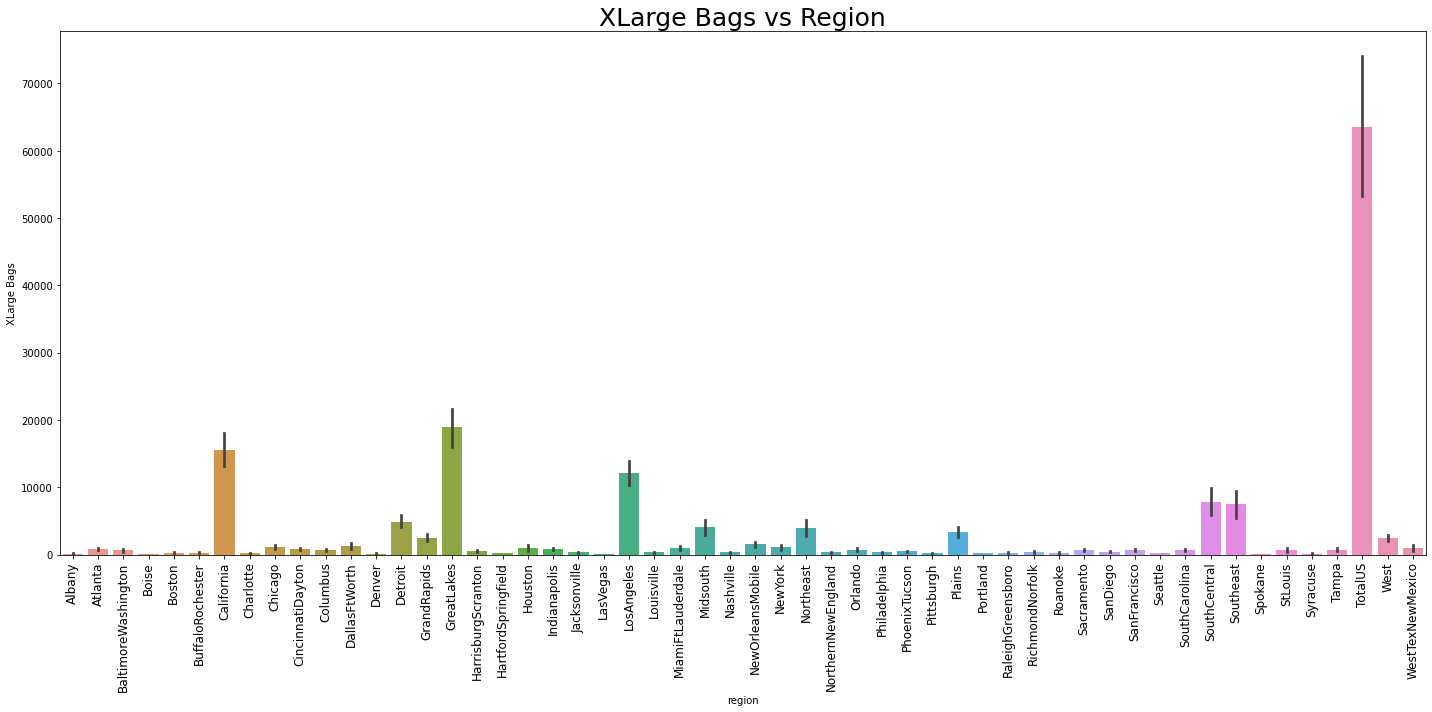

In [22]:
plt.figure(figsize = (20,10),)
sns.barplot(x = 'region', y = 'XLarge Bags', data = df)
plt.xticks(rotation = 90, size = 12)
plt.title('XLarge Bags vs Region', fontsize=25)
plt.tight_layout()

Observation - Total US region has the highest sales and highest volume of total volumns produced.

# Analysing Relation between Feature variables and Average Price as Target (type as hue)

1) Average Price vs Total Volume (Type as Hue)

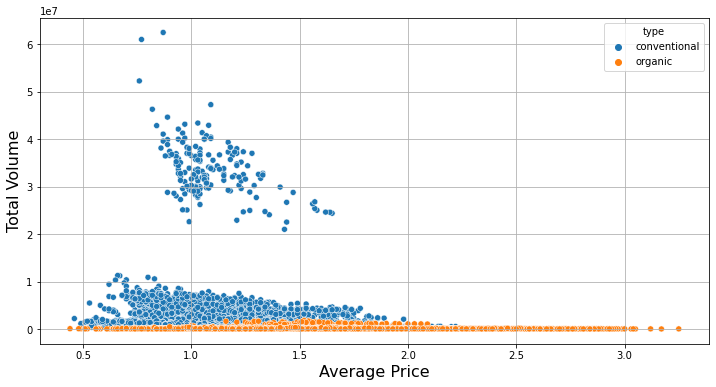

In [23]:
plt.figure(figsize = (12,6))
sns.scatterplot(y = 'Total Volume', x = 'AveragePrice', data  = df, color = 'g', hue = 'type')
plt.xlabel('Average Price',fontsize=16)
plt.ylabel('Total Volume',fontsize=16)
plt.grid()
plt.show()

Observation - Organic type is not produced in much volumes, conventional is produced in higher volumes

2) Average Price vs Date

In [24]:
# Splitting date column between days and month
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)
df.drop('Date', axis=1, inplace = True)

In [25]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


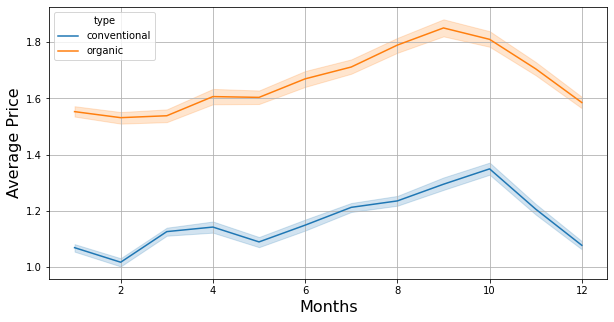

In [26]:
plt.figure(figsize=(10,5))
sns.lineplot(x="Month", y="AveragePrice", hue='type', data=df)
plt.xlabel('Months',fontsize=16)
plt.ylabel('Average Price',fontsize=16)
plt.grid()
plt.show()

Observation - 
- Here we can see that avg price for both type of Avacados increases from 6 to 12 month.
- Also avg price for Organic Avacados is greater than Conventional Avacados.

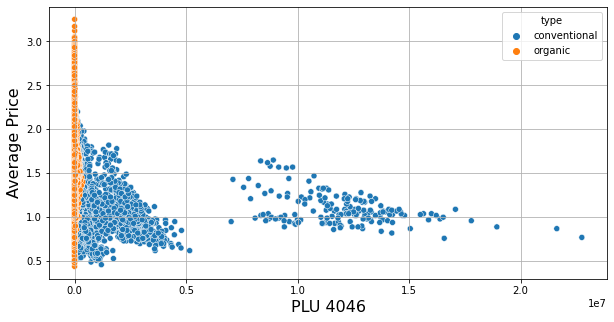

In [27]:
plt.figure(figsize=(10,5))
sns.scatterplot(x="4046", y="AveragePrice", hue='type', data=df)
plt.xlabel('PLU 4046',fontsize=16)
plt.ylabel('Average Price',fontsize=16)
plt.grid()
plt.show()

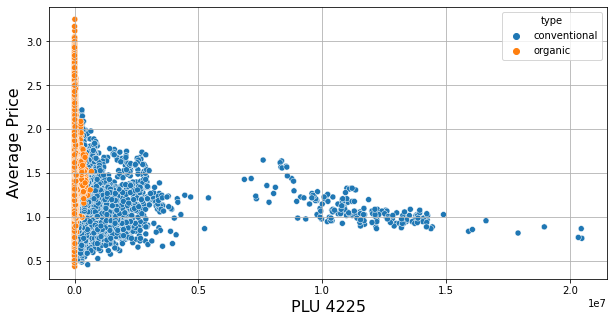

In [28]:
plt.figure(figsize=(10,5))
sns.scatterplot(x="4225", y="AveragePrice", hue='type', data=df)
plt.xlabel('PLU 4225',fontsize=16)
plt.ylabel('Average Price',fontsize=16)
plt.grid()
plt.show()

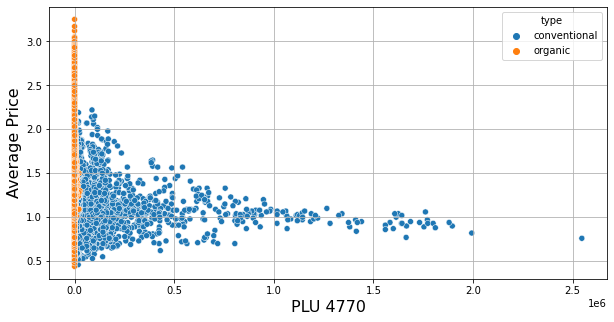

In [29]:
plt.figure(figsize=(10,5))
sns.scatterplot(x="4770", y="AveragePrice", hue='type', data=df)
plt.xlabel('PLU 4770',fontsize=16)
plt.ylabel('Average Price',fontsize=16)
plt.grid()
plt.show()

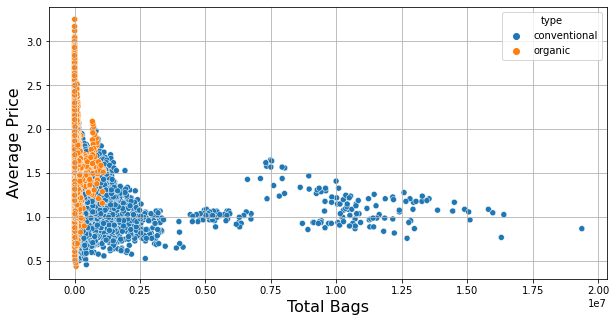

In [30]:
plt.figure(figsize=(10,5))
sns.scatterplot(x="Total Bags", y="AveragePrice", hue='type', data=df)
plt.xlabel('Total Bags',fontsize=16)
plt.ylabel('Average Price',fontsize=16)
plt.grid()
plt.show()

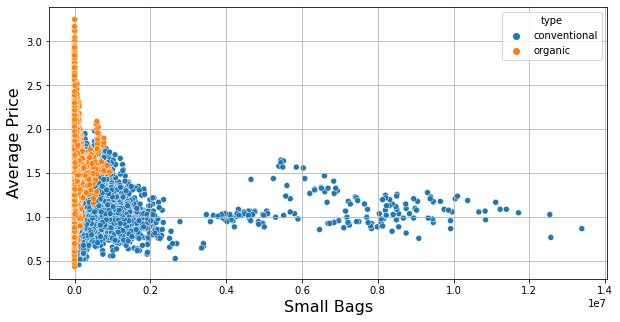

In [31]:
plt.figure(figsize=(10,5))
sns.scatterplot(x="Small Bags", y="AveragePrice", hue='type', data=df)
plt.xlabel('Small Bags',fontsize=16)
plt.ylabel('Average Price',fontsize=16)
plt.grid()
plt.show()

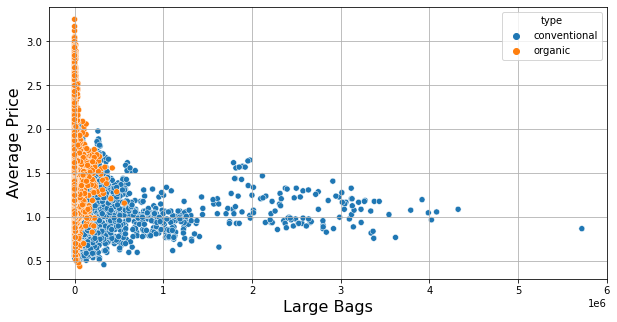

In [32]:
plt.figure(figsize=(10,5))
sns.scatterplot(x="Large Bags", y="AveragePrice", hue='type', data=df)
plt.xlabel('Large Bags',fontsize=16)
plt.ylabel('Average Price',fontsize=16)
plt.grid()
plt.show()

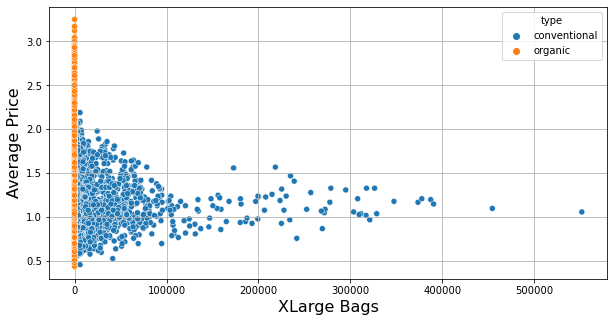

In [33]:
plt.figure(figsize=(10,5))
sns.scatterplot(x="XLarge Bags", y="AveragePrice", hue='type', data=df)
plt.xlabel('XLarge Bags',fontsize=16)
plt.ylabel('Average Price',fontsize=16)
plt.grid()
plt.show()

 Observation - Overall Organic Type of Avacados have higher Average Prices than conventional ones in each condition

# Visualizing all data together

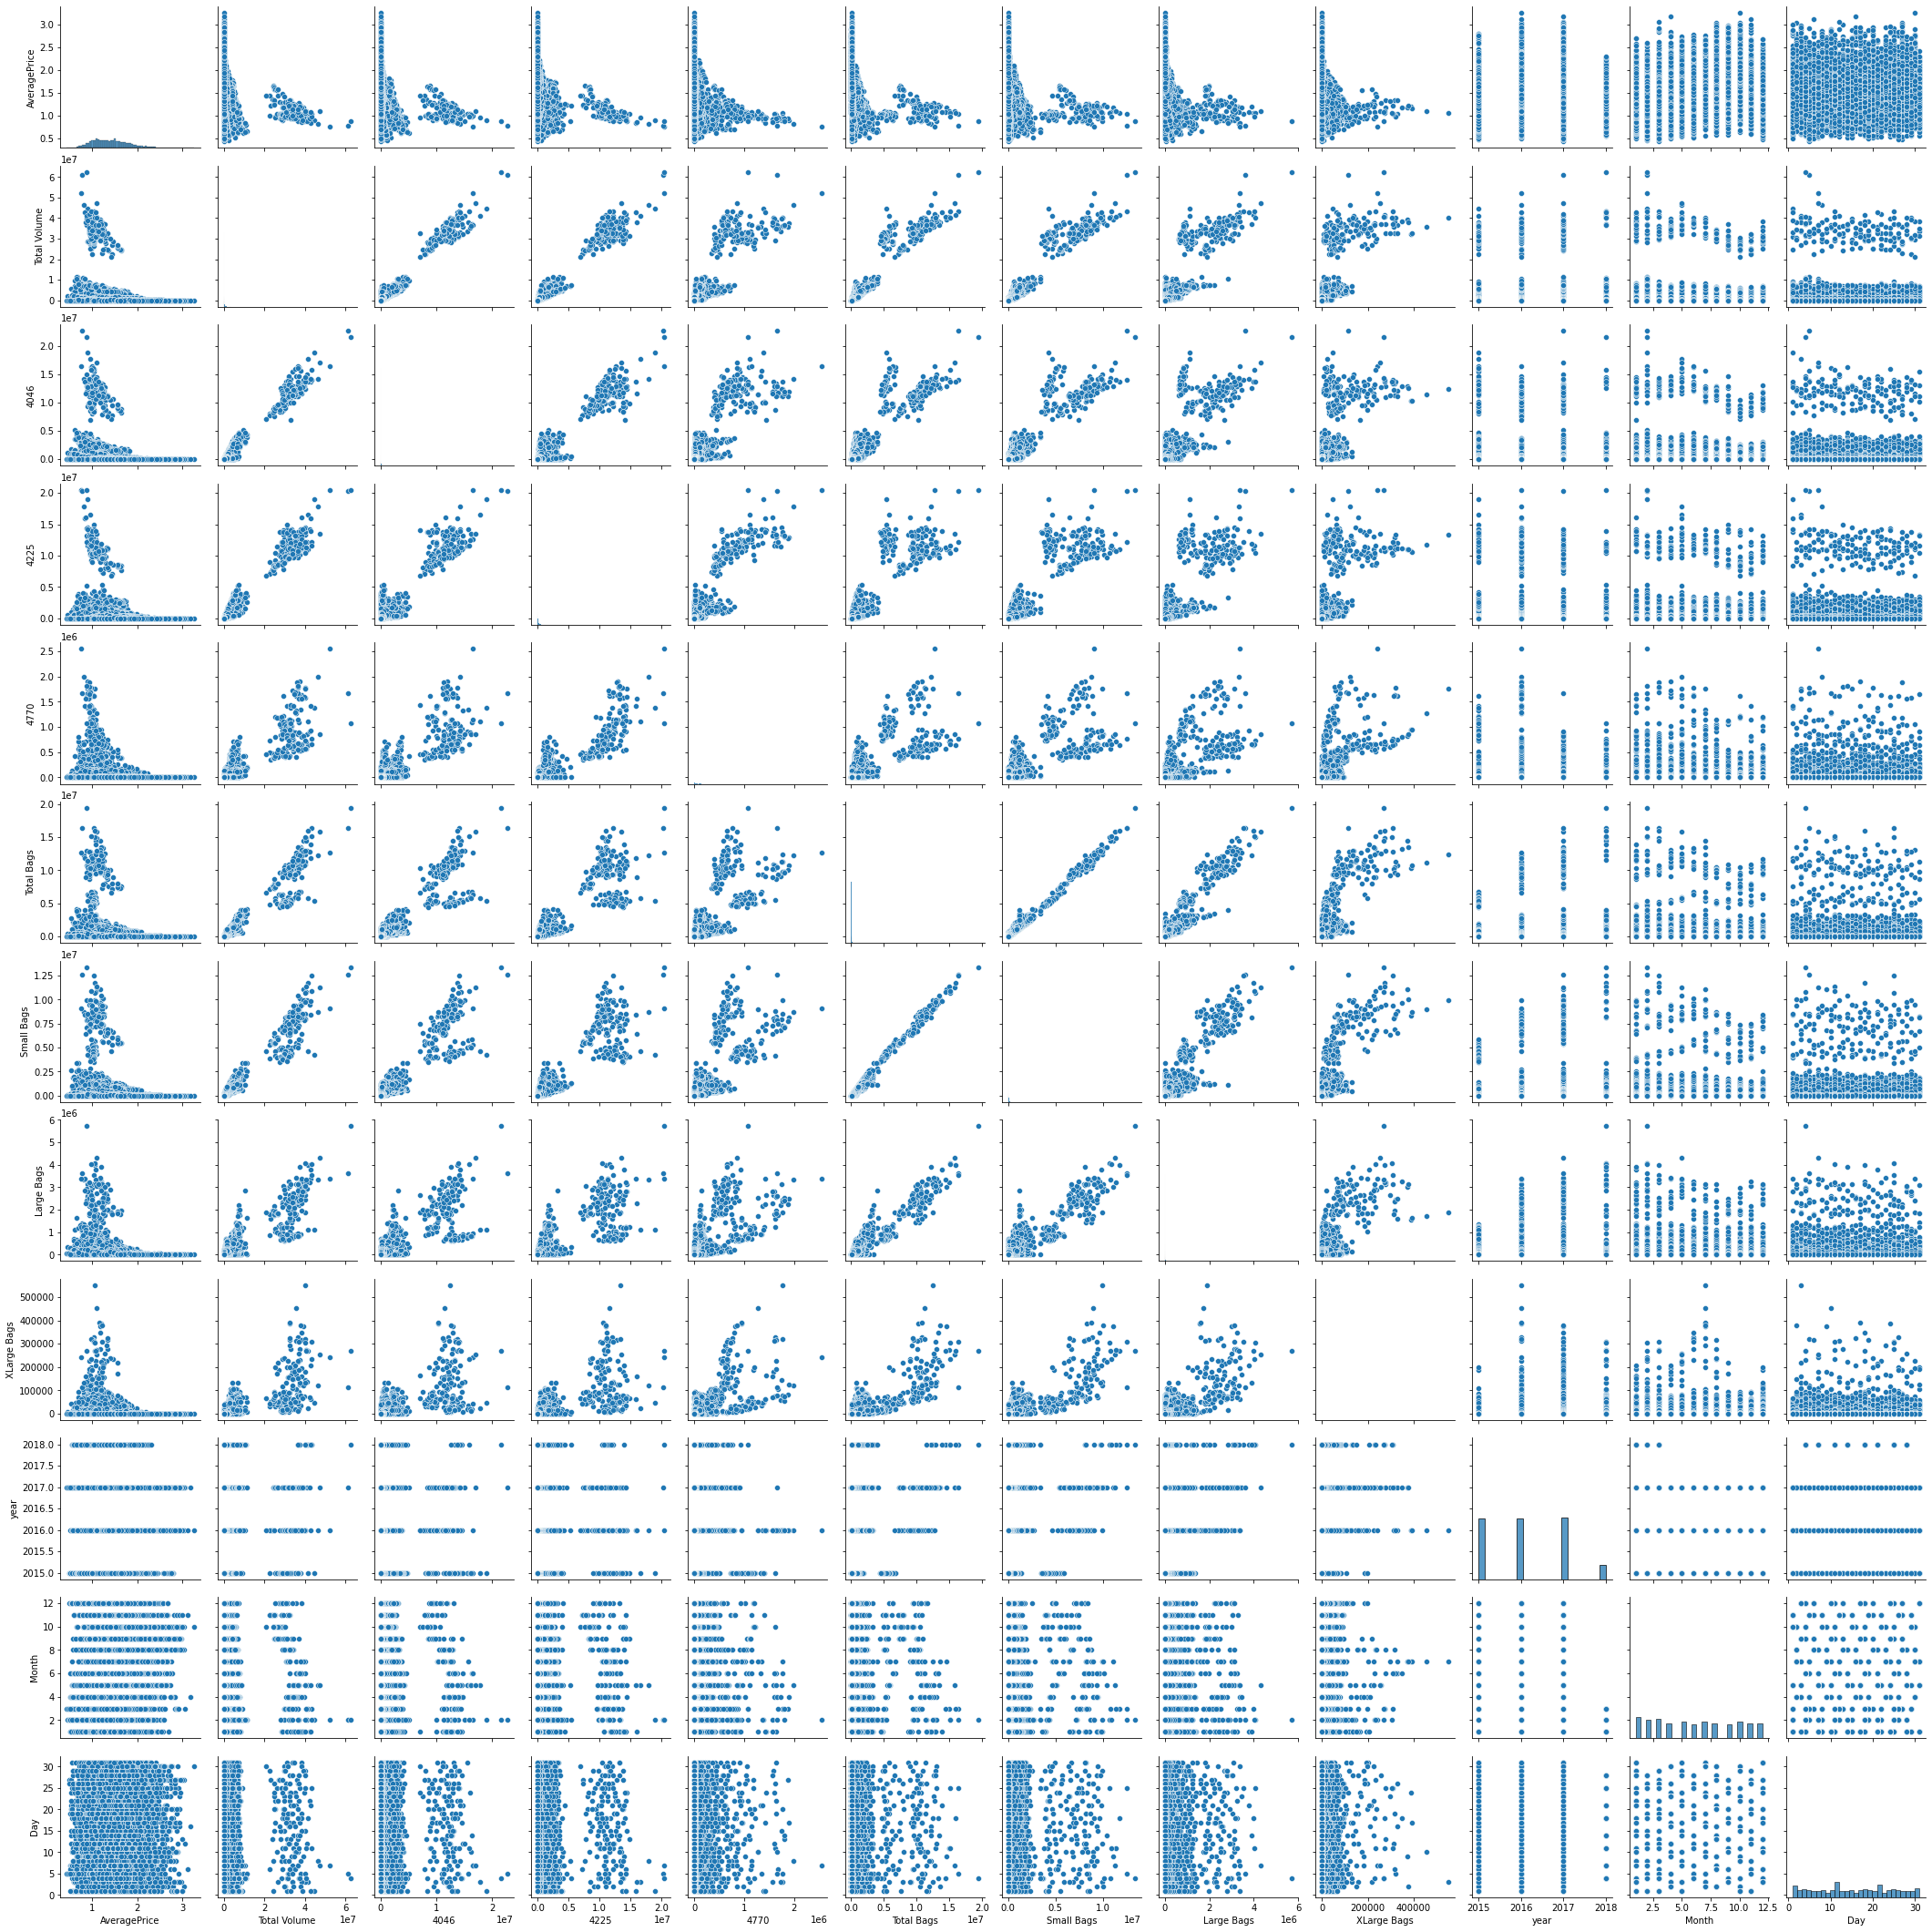

In [34]:
sns.pairplot(df)

# Label Encoding of Categorical Data

In [35]:
#doing label encoding for Region and Type
label_encoder = preprocessing.LabelEncoder()

df['region']= label_encoder.fit_transform(df['region'])
df['type']= label_encoder.fit_transform(df['type'])
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,11,29


In [36]:
df.isnull().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
Month           0
Day             0
dtype: int64

# Dropping Total Bags and Total Volume Feature

Observation - As total Bags is sum of small, large, Xlarge bags, hence total bags is dependent on sum of these three which will cause multicollinearity issue, also Total volume is sum of 4046, 4225 and 4770 it will also cause multicollinaerity hence droping these two columns

In [37]:
df.drop(columns=['Total Volume','Total Bags'], axis=1, inplace = True)
df.head()

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,1036.74,54454.85,48.16,8603.62,93.25,0.0,0,2015,0,12,27
1,1.35,674.28,44638.81,58.33,9408.07,97.49,0.0,0,2015,0,12,20
2,0.93,794.70,109149.67,130.50,8042.21,103.14,0.0,0,2015,0,12,13
3,1.08,1132.00,71976.41,72.58,5677.40,133.76,0.0,0,2015,0,12,6
4,1.28,941.48,43838.39,75.78,5986.26,197.69,0.0,0,2015,0,11,29


# Correlation

In [38]:
#lets find out the correlation between the columns
df.corr()

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
AveragePrice,1.000000,-0.208317,-0.172928,-0.179446,-0.174730,-0.172940,-0.117592,0.615845,0.093197,-0.011716,0.162409,0.027386
4046,-0.208317,1.000000,0.926110,0.833389,0.925280,0.838645,0.699377,-0.225819,0.003353,0.192073,-0.025803,-0.010159
4225,-0.172928,0.926110,1.000000,0.887855,0.916031,0.810015,0.688809,-0.232289,-0.009559,0.145726,-0.022108,-0.012393
4770,-0.179446,0.833389,0.887855,1.000000,0.802733,0.698471,0.679861,-0.210027,-0.036531,0.095252,-0.033424,-0.009009
Small Bags,-0.174730,0.925280,0.916031,0.802733,1.000000,0.902589,0.806845,-0.220535,0.063915,0.164702,-0.023126,-0.003870
Large Bags,-0.172940,0.838645,0.810015,0.698471,0.902589,1.000000,0.710858,-0.193177,0.087891,0.198768,-0.020187,-0.008352
XLarge Bags,-0.117592,0.699377,0.688809,0.679861,0.806845,0.710858,1.000000,-0.175483,0.081033,0.082281,-0.012969,0.000319
type,0.615845,-0.225819,-0.232289,-0.210027,-0.220535,-0.193177,-0.175483,1.000000,-0.000032,-0.000280,-0.000085,-0.000013
year,0.093197,0.003353,-0.009559,-0.036531,0.063915,0.087891,0.081033,-0.000032,1.000000,-0.000055,-0.177050,0.004475
region,-0.011716,0.192073,0.145726,0.095252,0.164702,0.198768,0.082281,-0.000280,-0.000055,1.000000,-0.000144,-0.000021


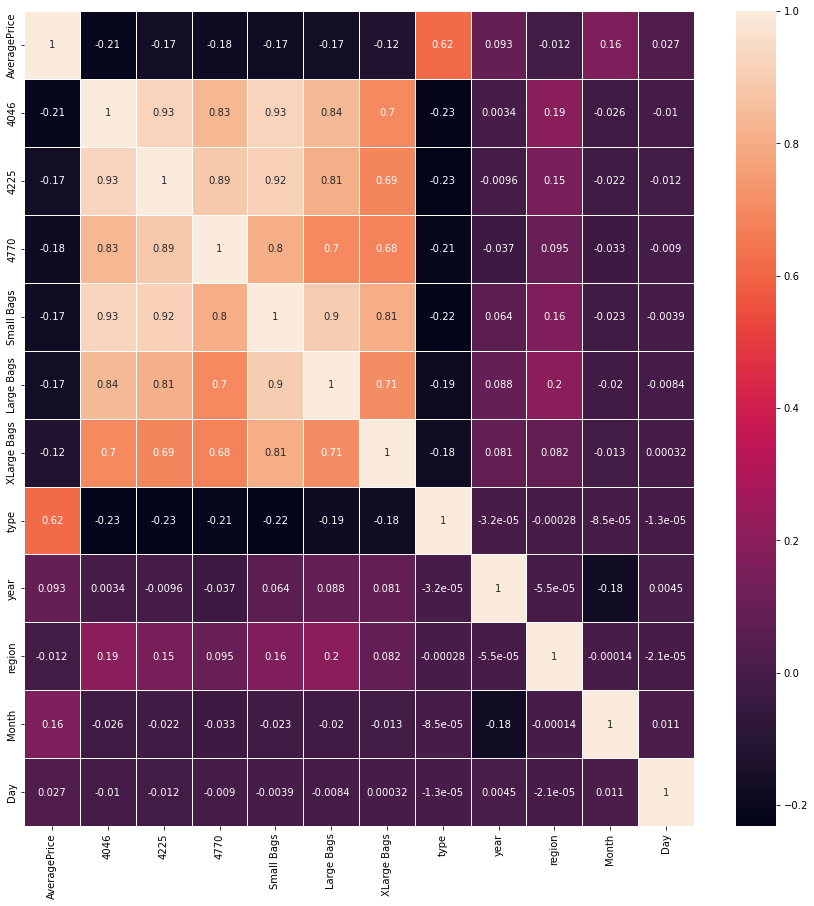

In [39]:
#lets plot the correlation
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,linewidth=1)
plt.show()

Observation - Feature variables are showing very high correlation between each other, which may raise nulticollinearity issue, we will detect this using VIF score later


# 1) Analysing df setting AveragePrice as Target

In [40]:
#lets find out the correlation of Feature variables with target variable 
df.corr()['AveragePrice'].sort_values()

4046           -0.208317
4770           -0.179446
Small Bags     -0.174730
Large Bags     -0.172940
4225           -0.172928
XLarge Bags    -0.117592
region         -0.011716
Day             0.027386
year            0.093197
Month           0.162409
type            0.615845
AveragePrice    1.000000
Name: AveragePrice, dtype: float64

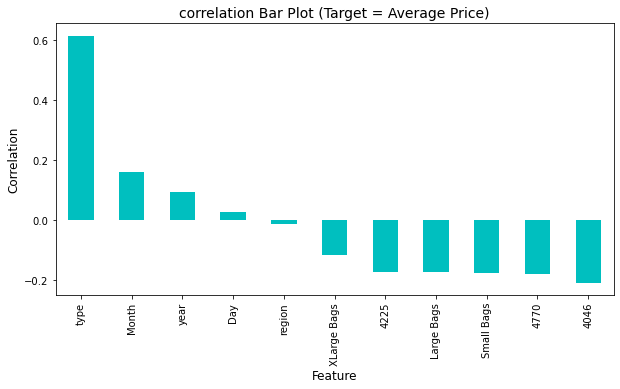

In [41]:
#Plotting the correlation (Average Price as target)
plt.figure(figsize=(10,5))
df.corr()['AveragePrice'].sort_values(ascending=False).drop(['AveragePrice']).plot(kind='bar' ,color='c')
plt.xlabel('Feature' ,fontsize=12)
plt.ylabel('Correlation',fontsize=12)
plt.title('correlation Bar Plot (Target = Average Price)',fontsize=14)
plt.show()

Observation  - only type has the strong bond with Target, rest all have weak bond with it

# 2) Analysing df setting Region as Target

In [42]:
#lets find out the correlation of Feature variables with target variable 
df.corr()['region'].sort_values()

AveragePrice   -0.011716
type           -0.000280
Month          -0.000144
year           -0.000055
Day            -0.000021
XLarge Bags     0.082281
4770            0.095252
4225            0.145726
Small Bags      0.164702
4046            0.192073
Large Bags      0.198768
region          1.000000
Name: region, dtype: float64

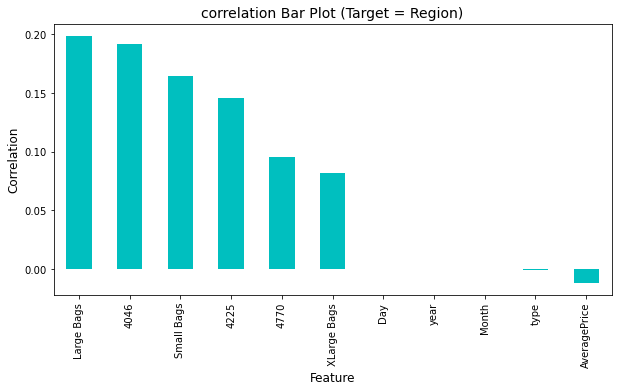

In [43]:
#Plotting the correlation (region as target)
plt.figure(figsize=(10,5))
df.corr()['region'].sort_values(ascending=False).drop(['region']).plot(kind='bar' ,color='c')
plt.xlabel('Feature' ,fontsize=12)
plt.ylabel('Correlation',fontsize=12)
plt.title('correlation Bar Plot (Target = Region)',fontsize=14)
plt.show()

Observation - None of the Features is having strong bond with Region as target

# Detecting Multicollinearity with VIF and Data Cleaning

Observed using heatmap that some of the feature variable have good correaltion which causes multicollinearity. lets test that using VIF score 

1) Average Price as Target

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF dataframe
vif_data = pd.DataFrame()

x_ap = df.drop('AveragePrice', axis=1)
y_ap = df['AveragePrice']

vif_data["feature"] = x_ap.columns
vif_data["VIF"] = [variance_inflation_factor(x_ap.values, i) for i in range(len(x_ap.columns))]
print(vif_data)

        feature        VIF
0          4046  10.609736
1          4225  14.127761
2          4770   5.613056
3    Small Bags  20.522569
4    Large Bags   5.864573
5   XLarge Bags   3.517298
6          type   2.119383
7          year  11.248954
8        region   4.159907
9         Month   4.062353
10          Day   4.188880


2) Region as Target

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF dataframe
vif_data = pd.DataFrame()

x_r = df.drop('region', axis=1)
y_r = df['region']

vif_data["feature"] = x_r.columns
vif_data["VIF"] = [variance_inflation_factor(x_r.values, i) for i in range(len(x_r.columns))]
print(vif_data)

         feature        VIF
0   AveragePrice  22.904882
1           4046  10.604794
2           4225  14.287573
3           4770   5.614725
4     Small Bags  20.509709
5     Large Bags   5.817589
6    XLarge Bags   3.518742
7           type   3.395016
8           year  19.967378
9          Month   4.238981
10           Day   4.193349


Observation - VIF Score is almost controlled. Lets select the best features using SelectKBest

# selecting Best Features

Statistical tests can be used to select those features that have the strongest relationship with the output variables. The scikit-learn library provides the SelectKBest with f_classif() class that can be used with a suite of different statistical tests to select a specific number of features

1) Average Price as Target

In [46]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

best_feature = SelectKBest(score_func=f_classif, k=8)
fit = best_feature.fit(x_ap, y_ap)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x_ap.columns)

# concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Specs', 'Score']  #naming the dataframe column

featureScores.sort_values(by=['Score'], ascending=False)

,Specs,Score
6,type,53.269112
0,4046,5.015080
2,4770,4.078789
1,4225,3.508901
3,Small Bags,3.331022
4,Large Bags,3.269397
7,year,3.056698
9,Month,3.051554
5,XLarge Bags,1.746996
8,region,1.334940


2) Region as Target

In [47]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

best_feature = SelectKBest(score_func=f_classif, k=8)
fit = best_feature.fit(x_r, y_r)

dfscores1 = pd.DataFrame(fit.scores_)
dfcolumns1 = pd.DataFrame(x_r.columns)

# concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns1, dfscores1], axis=1)
featureScores.columns = ['Specs', 'Score']  #naming the dataframe column

featureScores.sort_values(by=['Score'], ascending=False)

,Specs,Score
2,4225,308.834412
4,Small Bags,298.998145
1,4046,295.483768
5,Large Bags,254.735012
3,4770,208.050643
6,XLarge Bags,123.297554
0,AveragePrice,69.383811
7,type,0.000496
9,Month,0.000132
8,year,0.000018


Observation - Lets drop Day column here as it is least significant for both the cases

In [48]:
# Lets Drop Day as is least significant here
df.drop('Day', axis=1, inplace=True)
df.head()

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,1.33,1036.74,54454.85,48.16,8603.62,93.25,0.0,0,2015,0,12
1,1.35,674.28,44638.81,58.33,9408.07,97.49,0.0,0,2015,0,12
2,0.93,794.70,109149.67,130.50,8042.21,103.14,0.0,0,2015,0,12
3,1.08,1132.00,71976.41,72.58,5677.40,133.76,0.0,0,2015,0,12
4,1.28,941.48,43838.39,75.78,5986.26,197.69,0.0,0,2015,0,11


# Skewness

In [49]:
df.skew()

AveragePrice     0.580303
4046             8.648220
4225             8.942466
4770            10.159396
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
Month            0.106617
dtype: float64

Observation-

- The acceptable skewness range is +/- 0.5, we have observe that high level of skewness is involved.

# Distribution Curve

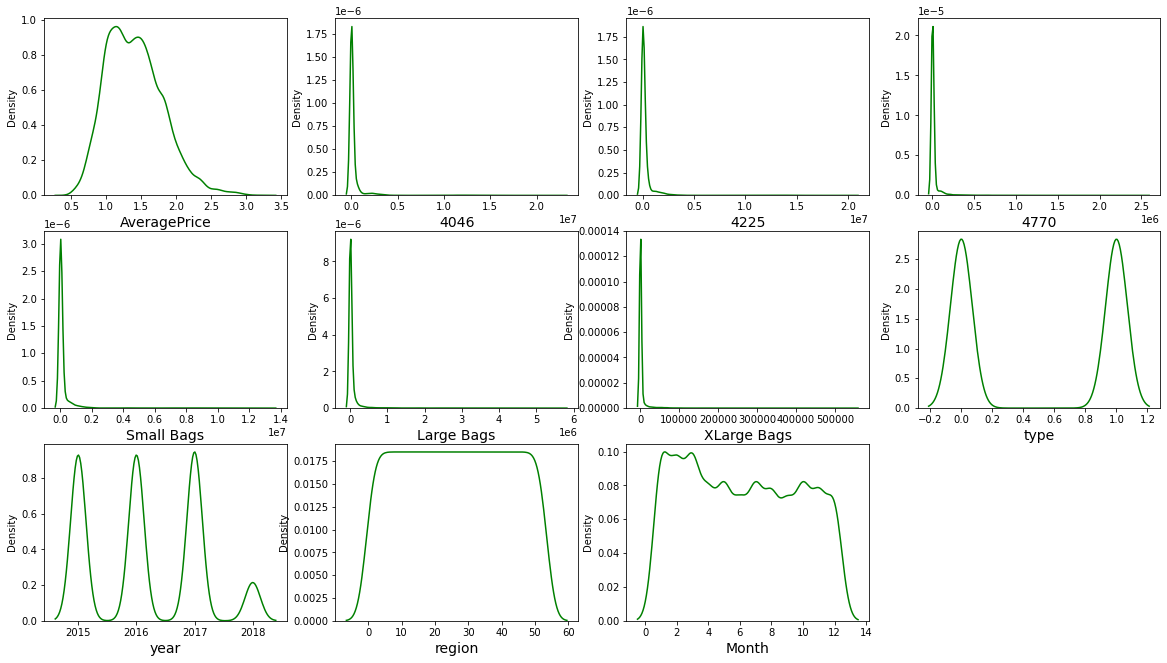

In [50]:
plt.figure(figsize=(20,15),facecolor='white')
plotnum=1
for col in df.columns:
    if plotnum<=12:
        plt.subplot(4,4,plotnum)
        sns.kdeplot(df[col], color = 'g')
        plt.xlabel(col,fontsize=14)
    plotnum+=1
plt.show()

# 7) Checking Outliers

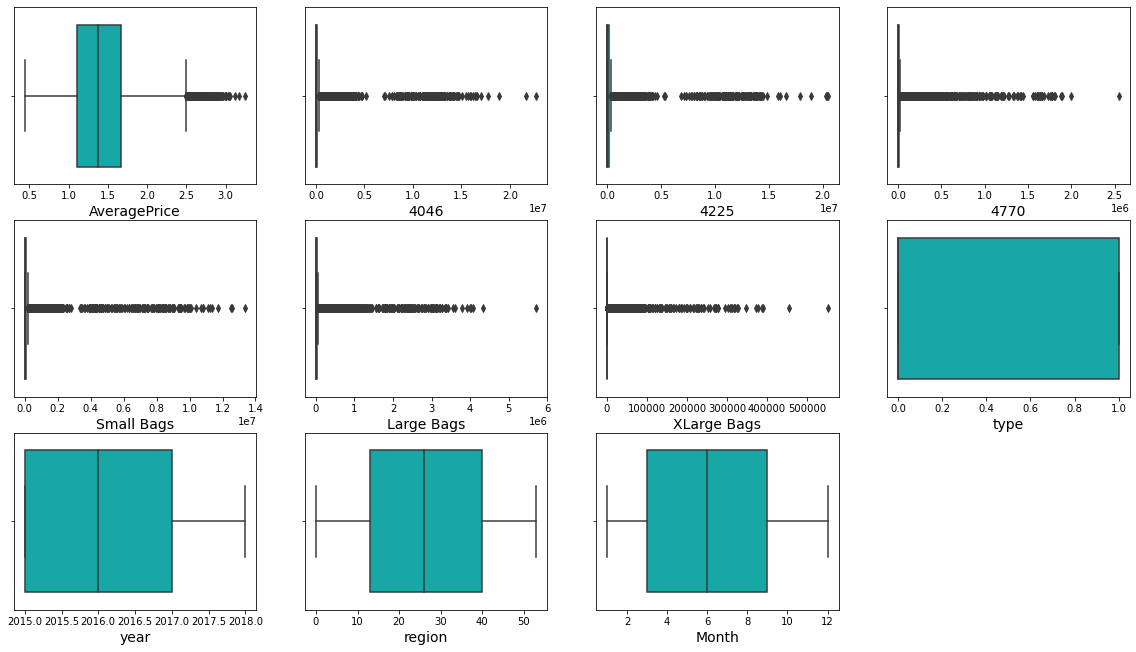

In [51]:
plt.figure(figsize=(20,15),facecolor='white')
plotnum=1
for col in df.columns:
    if plotnum<=12:
        plt.subplot(4,4,plotnum)
        sns.boxplot(df[col], color='c')
        plt.xlabel(col,fontsize=14)
    plotnum+=1
plt.show()

Observation - some of the columns are having a lot of outliers lets try to treat them using Z-score

# Treating Outliers using Z-Score

In [52]:
#using z-score method
from scipy.stats import zscore #import zscore from scipy library
zscore(df)

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,-0.188689,-0.230816,-0.199902,-0.212091,-0.232647,-0.222352,-0.17558,-0.999836,-1.221282,-1.700252,1.647632
1,-0.139020,-0.231103,-0.208054,-0.211997,-0.231568,-0.222335,-0.17558,-0.999836,-1.221282,-1.700252,1.647632
2,-1.182069,-0.231007,-0.154478,-0.211325,-0.233399,-0.222311,-0.17558,-0.999836,-1.221282,-1.700252,1.647632
3,-0.809551,-0.230741,-0.185350,-0.211864,-0.236568,-0.222186,-0.17558,-0.999836,-1.221282,-1.700252,1.647632
4,-0.312861,-0.230891,-0.208719,-0.211834,-0.236154,-0.221924,-0.17558,-0.999836,-1.221282,-1.700252,1.364669
...,...,...,...,...,...,...,...,...,...,...,...
18244,0.556347,-0.230017,-0.243857,-0.212540,-0.226665,-0.220964,-0.17558,1.000164,1.970504,1.700811,-1.181997
18245,0.755023,-0.230693,-0.242277,-0.212540,-0.232196,-0.221403,-0.17558,1.000164,1.970504,1.700811,-1.464959
18246,1.152375,-0.230693,-0.243090,-0.205766,-0.231644,-0.222561,-0.17558,1.000164,1.970504,1.700811,-1.464959
18247,1.301382,-0.230428,-0.242651,-0.205774,-0.229543,-0.222529,-0.17558,1.000164,1.970504,1.700811,-1.464959


In [53]:
z = np.abs(zscore(df))
z.shape

(18249, 11)

In [54]:
np.where(z>3) #detecting outliers where z>3

(array([  346,   359,   780, ..., 17304, 17402, 17428], dtype=int64),
 array([1, 1, 6, ..., 0, 0, 0], dtype=int64))

In [55]:
z.iloc[346] #checking one of the detected outliers

AveragePrice    1.306241
4046            3.199411
4225            2.581200
4770            1.578563
Small Bags      0.572525
Large Bags      0.141836
XLarge Bags     0.024443
type            0.999836
year            1.221282
region          1.315226
Month           0.333108
Name: 346, dtype: float64

In [56]:
#checking total number of rows where z>3
len(np.where(z>3)[0])

1415

In [57]:
#detecting loss if we remove the data containing these outliers
percent_loss = 1415*100/18249
print("Percent Loss: ",percent_loss)

Percent Loss:  7.753849526001424


there will be 7% data loss which is okay to deal with

In [58]:
#removing outliers

df_new = df[(z<3).all(axis=1)]

print("Old Data Frame:",df.shape)
print("New Data Frame:",df_new.shape)
print("Total Dropped Rows:",df.shape[0] - df_new.shape[0])

Old Data Frame: (18249, 11)
New Data Frame: (17651, 11)
Total Dropped Rows: 598


Observation - Only 598 rows removed for treating outliers, remaining data contain 17651 rows.

In [59]:
df_new.shape

(17651, 11)

# Checking Outliers again using boxplot

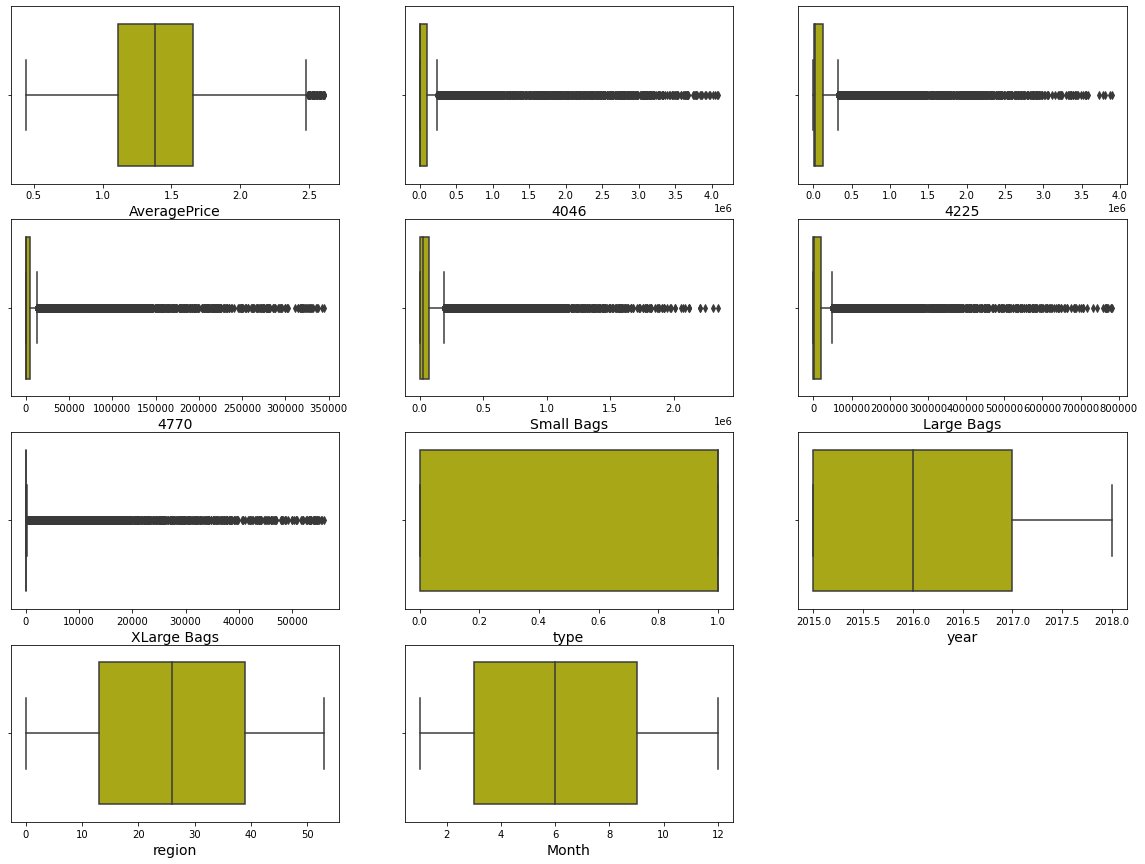

In [60]:
plt.figure(figsize=(20,15),facecolor='white')
plotnum=1
for col in df_new.columns:
    if plotnum<=12:
        plt.subplot(4,3,plotnum)
        sns.boxplot(df_new[col], color='y')
        plt.xlabel(col,fontsize=14)
    plotnum+=1
plt.show()

Observation - outliers are not much treated using Z score method lets treat them using IQR method

# Treating Outliers using IQR method

In [61]:
X = df_new.drop(columns=['AveragePrice','region'], axis=1)
Y_avgprice = df_new['AveragePrice']
Y_region = df_new['region']
X

,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,Month
0,1036.74,54454.85,48.16,8603.62,93.25,0.0,0,2015,12
1,674.28,44638.81,58.33,9408.07,97.49,0.0,0,2015,12
2,794.70,109149.67,130.50,8042.21,103.14,0.0,0,2015,12
3,1132.00,71976.41,72.58,5677.40,133.76,0.0,0,2015,12
4,941.48,43838.39,75.78,5986.26,197.69,0.0,0,2015,11
...,...,...,...,...,...,...,...,...,...
18244,2046.96,1529.20,0.00,13066.82,431.85,0.0,1,2018,2
18245,1191.70,3431.50,0.00,8940.04,324.80,0.0,1,2018,1
18246,1191.92,2452.79,727.94,9351.80,42.31,0.0,1,2018,1
18247,1527.63,2981.04,727.01,10919.54,50.00,0.0,1,2018,1


In [62]:
#create new dataframe
X_new = pd.DataFrame()

def detect_and_treat_outliers_iqr(data):
    new_list = []
    #data = sorted(data)
    
    mean = np.mean(data)# calculating median

    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)

    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            i = mean    #replacing outlier with median
        new_list.append(i)
    return new_list 


for col in X.columns:
    X_new[col] = detect_and_treat_outliers_iqr(X[col])
    
X_new      

,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,Month
0,1036.74,54454.85,48.16,8603.62,93.25,0.0,0,2015,12
1,674.28,44638.81,58.33,9408.07,97.49,0.0,0,2015,12
2,794.70,109149.67,130.50,8042.21,103.14,0.0,0,2015,12
3,1132.00,71976.41,72.58,5677.40,133.76,0.0,0,2015,12
4,941.48,43838.39,75.78,5986.26,197.69,0.0,0,2015,11
...,...,...,...,...,...,...,...,...,...
17646,2046.96,1529.20,0.00,13066.82,431.85,0.0,1,2018,2
17647,1191.70,3431.50,0.00,8940.04,324.80,0.0,1,2018,1
17648,1191.92,2452.79,727.94,9351.80,42.31,0.0,1,2018,1
17649,1527.63,2981.04,727.01,10919.54,50.00,0.0,1,2018,1


In the above method we detected the Outliers using IQR method and replaced them with mean

# Ploting Boxplot

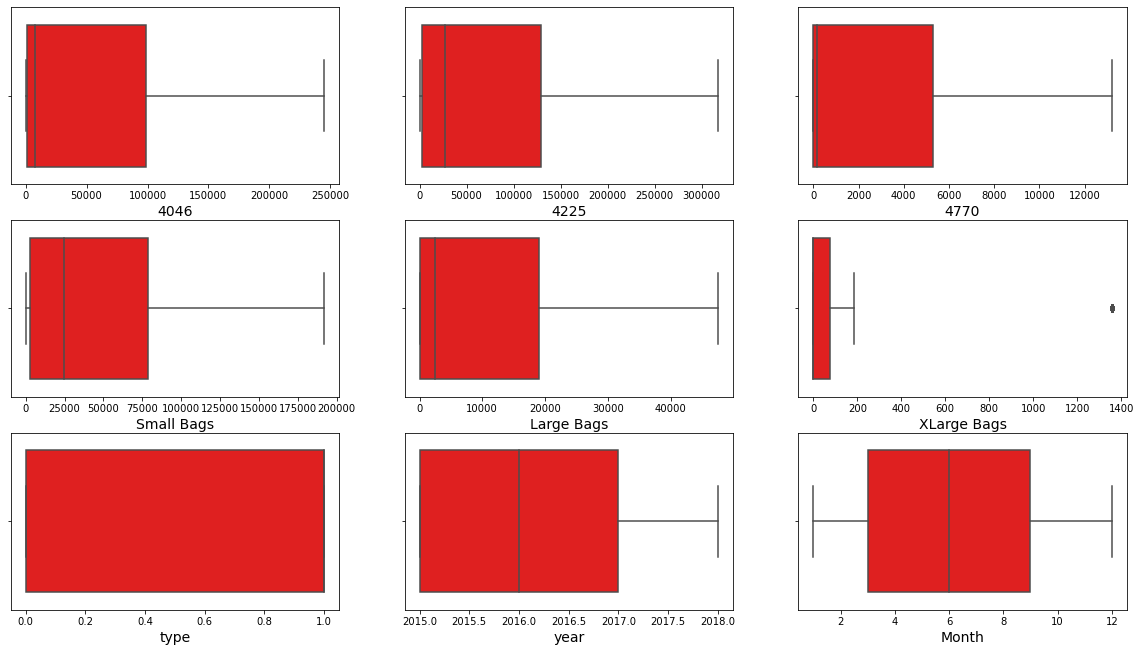

In [63]:
plt.figure(figsize=(20,15),facecolor='white')
plotnum=1
for col in X_new.columns:
    if plotnum<=10:
        plt.subplot(4,3,plotnum)
        sns.boxplot(X_new[col], color='r')
        plt.xlabel(col,fontsize=14)
    plotnum+=1
plt.show()

Observation - outliers have been treated well now. 

# Concatinating data Again

In [64]:
df2 = pd.concat([X_new, Y_region,Y_avgprice], axis=1, join='inner')
df2.head()

,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,Month,region,AveragePrice
0,1036.74,54454.85,48.16,8603.62,93.25,0.0,0,2015,12,0,1.33
1,674.28,44638.81,58.33,9408.07,97.49,0.0,0,2015,12,0,1.35
2,794.70,109149.67,130.50,8042.21,103.14,0.0,0,2015,12,0,0.93
3,1132.00,71976.41,72.58,5677.40,133.76,0.0,0,2015,12,0,1.08
4,941.48,43838.39,75.78,5986.26,197.69,0.0,0,2015,11,0,1.28


In [65]:
df2.shape

(17053, 11)

In [66]:
df2.isnull().sum()

4046            0
4225            0
4770            0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
Month           0
region          0
AveragePrice    0
dtype: int64

# Model Building

# (PART-1) Taking Region as Target

As region has more than two posible values so it is a multiclass classification Problem

In [67]:
#seperating Feature and Target Variable
X = df2.drop('region', axis=1)
Y = df2['region']

 1) Balancing Region

<AxesSubplot:xlabel='region', ylabel='count'>

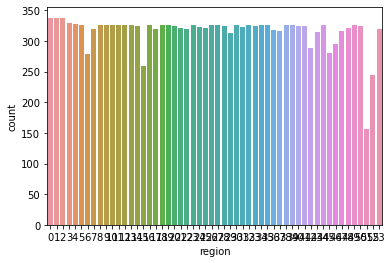

In [68]:
sns.countplot(Y)

In [69]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
X,Y = smt.fit_resample(X,Y,)
X,Y

(               4046           4225         4770     Small Bags    Large Bags  \
 0       1036.740000   54454.850000    48.160000    8603.620000     93.250000   
 1        674.280000   44638.810000    58.330000    9408.070000     97.490000   
 2        794.700000  109149.670000   130.500000    8042.210000    103.140000   
 3       1132.000000   71976.410000    72.580000    5677.400000    133.760000   
 4        941.480000   43838.390000    75.780000    5986.260000    197.690000   
 ...             ...            ...          ...            ...           ...   
 18247    210.921867    5618.437027     0.000000    1636.272928  14023.904999   
 18248  42348.831812    3130.187230  9493.553241   38940.599963    217.086862   
 18249    208.113288    4612.528674     0.000000     496.239250  12354.170145   
 18250    936.299759   72419.361954    40.975535   14557.600465    570.826145   
 18251  88611.059419  255953.510558   387.905252  183420.283898   6548.448686   
 
        XLarge Bags  type 

In [70]:
X.shape

(18252, 10)

<AxesSubplot:xlabel='region', ylabel='count'>

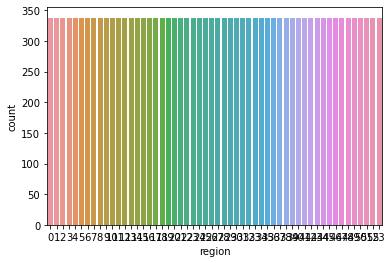

In [71]:
sns.countplot(Y)

2) Transforming Data (Power Transform)

In [72]:
from sklearn.preprocessing import power_transform

X = power_transform(X, method='yeo-johnson')
type(X)
X

array([[-7.05822392e-01,  4.81571839e-01, -2.29956251e-01, ...,
        -1.80233606e-12,  1.49886576e+00, -1.00574964e-01],
       [-8.28169085e-01,  3.70487464e-01, -1.79921011e-01, ...,
        -1.80233606e-12,  1.49886576e+00, -4.72602737e-02],
       [-7.82167696e-01,  9.03559401e-01,  3.37909058e-02, ...,
        -1.80233606e-12,  1.49886576e+00, -1.28403874e+00],
       ...,
       [-1.13234181e+00, -6.48811088e-01, -1.22840216e+00, ...,
        -2.00561789e-13,  8.21384441e-01,  4.40173964e-01],
       [-7.35366266e-01,  6.48125854e-01, -2.71863893e-01, ...,
        -2.00561789e-13, -8.61357147e-01, -2.05323476e+00],
       [ 9.96818991e-01,  1.49964484e+00,  3.30038858e-01, ...,
         2.99449354e-12, -1.64407964e+00, -9.55626372e-01]])

In [73]:
X.ndim

2

In [74]:
X.mean()

2.6783552608094943e-17

In [75]:
X.std()

0.9486832980505138

mean = 0 and Standard deviation = 0.95

In [76]:
X.shape

(18252, 10)

3) Feature Scaling using Standard Scaler

In [77]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X = pd.DataFrame(sc.fit_transform(X))
X

,0,1,2,3,4,5,6,7,8,9
0,-0.705822,0.481572,-0.229956,-0.418280,-0.858517,-0.669394,-1.047132,-1.210218,1.498866,-0.100575
1,-0.828169,0.370487,-0.179921,-0.375164,-0.848494,-0.669394,-1.047132,-1.210218,1.498866,-0.047260
2,-0.782168,0.903559,0.033791,-0.450233,-0.835690,-0.669394,-1.047132,-1.210218,1.498866,-1.284039
3,-0.680050,0.644449,-0.122429,-0.607282,-0.775078,-0.669394,-1.047132,-1.210218,1.498866,-0.811768
4,-0.733776,0.360575,-0.111032,-0.584213,-0.679120,-0.669394,-1.047132,-1.210218,1.280807,-0.236041
...,...,...,...,...,...,...,...,...,...,...
18247,-1.129109,-0.576047,-1.228402,-1.073913,0.851830,-0.669394,0.954990,0.938920,0.055264,-0.228556
18248,0.649570,-0.784368,1.238166,0.447186,-0.655233,1.110236,-1.047132,0.938920,-0.861357,-1.621334
18249,-1.132342,-0.648811,-1.228402,-1.409477,0.790292,-0.669394,0.954990,-0.134680,0.821384,0.440174
18250,-0.735366,0.648126,-0.271864,-0.151039,-0.386843,1.290546,-1.047132,-0.134680,-0.861357,-2.053235


4) Model Building - I will train the follwoing models -

- A. Logistic Regression
- B. Decision Trees
- C. Random Forests
- D. SVC linear kernel
- E. SGD Classifier
- F. KNN (K_nearest_neighbors)
- G. AdaBoost Classifier
- H. Gradiant Boost Classifier
- I. Bagging Classifier

In [78]:
#importing some important libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,f1_score,roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

5) Finding best Random State

In [79]:
#Choosing the best random state for our ML Model
maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_train, x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.20,random_state = i, stratify=Y)
    lr = LogisticRegression()
    lr.fit(x_train, y_train)
    
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    
    acc_train = accuracy_score(y_train,pred_train)
    acc_test = accuracy_score(y_test,pred_test)
    
    if acc_test > maxAccu:
        maxAccu = acc_test
        maxRS = i
print('test accuracy is :',maxAccu,'random_state is:',maxRS)

test accuracy is : 0.142974527526705 random_state is: 72


6) Creating the Training and Testing data set

In [80]:
x_train,x_test,y_train,y_test= train_test_split(X,Y,random_state=maxRS, test_size=0.20, stratify = Y)

#creating models empty dataframe
models_df = pd.DataFrame() 

7) Machine Learning Model

In [81]:

def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = preprocessing.LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

def reg_func(model, X, Y, model_name,sc):    
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    
    #classification report
    print('Classification Report :\n',classification_report(y_test,pred))
    
    #accracy score
    acs = accuracy_score(y_test,pred)
    print('Accuracy :',acs)
    
    #cross validation score
    cvs = cross_val_score(model,X,Y,cv=10).mean()
    print('Cross validation score :',cvs)
    
    #difference in accuracy and cross validation score
    diff = abs(acs - cvs)
    print('Accuracy and CV Score Diff :', diff)
    
    #ROC Score
    rocs = multiclass_roc_auc_score(y_test,pred)
    print("ROC AUC Score :", rocs)
    
    #appending data to dataframe
    models_df[sc] = [model_name, acs, cvs, diff, rocs]

(A) Logistic Regression

In [82]:
reg_func(LogisticRegression(),X,Y, 'LogisticRegression','lr')

Classification Report :
               precision    recall  f1-score   support

           0       0.25      0.44      0.32        68
           1       0.00      0.00      0.00        68
           2       0.15      0.13      0.14        68
           3       0.33      0.04      0.08        68
           4       0.17      0.10      0.13        67
           5       0.14      0.06      0.08        68
           6       0.21      0.24      0.22        67
           7       0.28      0.12      0.16        68
           8       0.14      0.22      0.17        68
           9       0.09      0.12      0.11        67
          10       0.21      0.19      0.20        68
          11       0.29      0.36      0.32        67
          12       0.06      0.04      0.05        68
          13       0.00      0.00      0.00        67
          14       0.14      0.25      0.18        67
          15       0.00      0.00      0.00        68
          16       0.21      0.21      0.21        68
  

(B) Decision Tree Classifier

In [83]:
from sklearn.tree import DecisionTreeClassifier
reg_func(DecisionTreeClassifier(), X, Y, 'DecisionTreeClassifier','dtc')

Classification Report :
               precision    recall  f1-score   support

           0       0.74      0.74      0.74        68
           1       0.70      0.71      0.70        68
           2       0.76      0.79      0.78        68
           3       0.75      0.66      0.70        68
           4       0.71      0.76      0.73        67
           5       0.74      0.85      0.79        68
           6       0.83      0.79      0.81        67
           7       0.81      0.74      0.77        68
           8       0.77      0.72      0.74        68
           9       0.77      0.76      0.77        67
          10       0.67      0.62      0.64        68
          11       0.72      0.76      0.74        67
          12       0.61      0.65      0.63        68
          13       0.74      0.69      0.71        67
          14       0.66      0.73      0.70        67
          15       0.74      0.78      0.76        68
          16       0.80      0.84      0.82        68
  

(C) Random Forests Classifier

In [84]:
from sklearn.ensemble import RandomForestClassifier
reg_func(RandomForestClassifier(), X, Y,'RandomForestClassifier','rfc')

Classification Report :
               precision    recall  f1-score   support

           0       0.89      0.93      0.91        68
           1       0.88      0.87      0.87        68
           2       0.94      0.93      0.93        68
           3       0.93      0.96      0.94        68
           4       0.82      0.88      0.85        67
           5       0.90      0.97      0.94        68
           6       0.91      0.87      0.89        67
           7       0.92      0.90      0.91        68
           8       0.92      0.87      0.89        68
           9       0.86      0.91      0.88        67
          10       0.94      0.90      0.92        68
          11       0.90      0.94      0.92        67
          12       0.91      0.87      0.89        68
          13       0.83      0.82      0.83        67
          14       0.78      0.81      0.79        67
          15       0.84      0.93      0.88        68
          16       0.88      0.90      0.89        68
  

(D) SVM Classifier

In [85]:
from sklearn.svm import SVC
reg_func(SVC(),X,Y,'SVM Classifier','svmc')

Classification Report :
               precision    recall  f1-score   support

           0       0.52      0.71      0.60        68
           1       0.64      0.47      0.54        68
           2       0.69      0.75      0.72        68
           3       0.56      0.62      0.59        68
           4       0.51      0.52      0.52        67
           5       0.63      0.71      0.67        68
           6       0.47      0.72      0.56        67
           7       0.69      0.75      0.72        68
           8       0.70      0.66      0.68        68
           9       0.46      0.66      0.54        67
          10       0.39      0.50      0.44        68
          11       0.65      0.66      0.65        67
          12       0.62      0.71      0.66        68
          13       0.60      0.51      0.55        67
          14       0.47      0.48      0.47        67
          15       0.63      0.62      0.62        68
          16       0.60      0.57      0.59        68
  

(E) SGD Classifier

In [86]:
from sklearn.linear_model import SGDClassifier
reg_func(SGDClassifier(),X,Y,'SGD Classifier','sgdc')

Classification Report :
               precision    recall  f1-score   support

           0       0.06      0.19      0.09        68
           1       0.22      0.06      0.09        68
           2       0.00      0.00      0.00        68
           3       0.00      0.00      0.00        68
           4       0.04      0.04      0.04        67
           5       0.00      0.00      0.00        68
           6       0.00      0.00      0.00        67
           7       0.00      0.00      0.00        68
           8       0.00      0.00      0.00        68
           9       0.00      0.00      0.00        67
          10       0.08      0.12      0.10        68
          11       0.20      0.12      0.15        67
          12       0.00      0.00      0.00        68
          13       0.03      0.34      0.06        67
          14       0.18      0.06      0.09        67
          15       0.12      0.29      0.17        68
          16       0.17      0.22      0.19        68
  

(F) KNN (k Nearest Neighbour)

In [87]:
from sklearn.neighbors import KNeighborsClassifier
reg_func(KNeighborsClassifier(weights = 'distance'),X,Y,'KNN','knn')

Classification Report :
               precision    recall  f1-score   support

           0       0.76      0.82      0.79        68
           1       0.82      0.75      0.78        68
           2       0.92      0.84      0.88        68
           3       0.84      0.79      0.82        68
           4       0.73      0.79      0.76        67
           5       0.91      0.90      0.90        68
           6       0.77      0.87      0.82        67
           7       0.92      0.84      0.88        68
           8       0.88      0.87      0.87        68
           9       0.82      0.90      0.86        67
          10       0.71      0.74      0.72        68
          11       0.92      0.84      0.88        67
          12       0.89      0.87      0.88        68
          13       0.80      0.72      0.76        67
          14       0.73      0.69      0.71        67
          15       0.81      0.90      0.85        68
          16       0.86      0.91      0.89        68
  

(G) ADA Boost Classifier

In [88]:
from sklearn.ensemble import AdaBoostClassifier
reg_func(AdaBoostClassifier(), X,Y,'AdaBoostClassifier','abc')

Classification Report :
               precision    recall  f1-score   support

           0       0.41      0.10      0.16        68
           1       0.00      0.00      0.00        68
           2       0.25      0.37      0.30        68
           3       0.03      0.03      0.03        68
           4       0.33      0.07      0.12        67
           5       0.13      0.16      0.14        68
           6       0.32      0.16      0.22        67
           7       0.00      0.00      0.00        68
           8       0.04      0.06      0.05        68
           9       0.02      0.09      0.03        67
          10       0.08      0.07      0.08        68
          11       0.15      0.03      0.05        67
          12       0.12      0.12      0.12        68
          13       0.39      0.10      0.16        67
          14       0.10      0.18      0.13        67
          15       0.04      0.03      0.03        68
          16       0.03      0.03      0.03        68
  

(H) Gradient Boost Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
reg_func(GradientBoostingClassifier(),X,Y,'GradientBoostingClassifier','gbc')

(I) Bagging Classifier

In [90]:
from sklearn.ensemble import BaggingClassifier
reg_func(BaggingClassifier(),X,Y,'BaggingClassifier','bc')

Classification Report :
               precision    recall  f1-score   support

           0       0.77      0.90      0.83        68
           1       0.84      0.79      0.82        68
           2       0.85      0.94      0.90        68
           3       0.80      0.93      0.86        68
           4       0.72      0.79      0.75        67
           5       0.84      0.94      0.89        68
           6       0.89      0.84      0.86        67
           7       0.86      0.88      0.87        68
           8       0.95      0.85      0.90        68
           9       0.76      0.84      0.79        67
          10       0.80      0.78      0.79        68
          11       0.88      0.85      0.86        67
          12       0.74      0.84      0.79        68
          13       0.77      0.76      0.77        67
          14       0.72      0.84      0.77        67
          15       0.79      0.93      0.85        68
          16       0.77      0.85      0.81        68
  

In [91]:
model_stats = models_df.transpose()
model_stats

,0,1,2,3,4
lr,LogisticRegression,0.142975,0.075501,0.067474,0.563455
dtc,DecisionTreeClassifier,0.715147,0.385112,0.330035,0.854863
rfc,RandomForestClassifier,0.885511,0.508876,0.376635,0.941682
svmc,SVM Classifier,0.569159,0.255428,0.313731,0.780463
sgdc,SGD Classifier,0.058614,0.043011,0.015603,0.520395
knn,KNN,0.822514,0.36314,0.459374,0.909558
abc,AdaBoostClassifier,0.087099,0.066679,0.02042,0.534969
gbc,GradientBoostingClassifier,0.606683,0.287316,0.319367,0.799597
bc,BaggingClassifier,0.811285,0.452117,0.359167,0.9038


In [92]:
model_stats.columns = ['Model','Accuracy Score', 'Cross Validation Score', 'Difference','ROC Score']
model_stats

,Model,Accuracy Score,Cross Validation Score,Difference,ROC Score
lr,LogisticRegression,0.142975,0.075501,0.067474,0.563455
dtc,DecisionTreeClassifier,0.715147,0.385112,0.330035,0.854863
rfc,RandomForestClassifier,0.885511,0.508876,0.376635,0.941682
svmc,SVM Classifier,0.569159,0.255428,0.313731,0.780463
sgdc,SGD Classifier,0.058614,0.043011,0.015603,0.520395
knn,KNN,0.822514,0.36314,0.459374,0.909558
abc,AdaBoostClassifier,0.087099,0.066679,0.02042,0.534969
gbc,GradientBoostingClassifier,0.606683,0.287316,0.319367,0.799597
bc,BaggingClassifier,0.811285,0.452117,0.359167,0.9038


8) Visualizing Accuracy Score for all Models

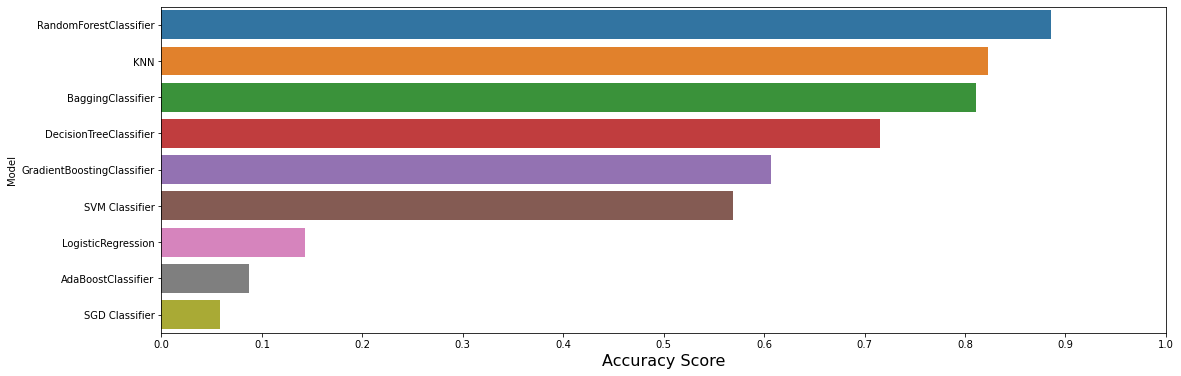

In [93]:
f, axe = plt.subplots(1,1, figsize=(18,6))

model_stats.sort_values(by=['Accuracy Score'], ascending=False, inplace=True)

sns.barplot(x='Accuracy Score', y='Model', data = model_stats, ax = axe)
axe.set_xlabel('Accuracy Score', size=16)
axe.set_ylabel('Model')
axe.set_xlim(0,1.0)
axe.set_xticks(np.arange(0, 1.1, 0.1))
plt.show()

9) Visualizing Cross Validation Score for all Models

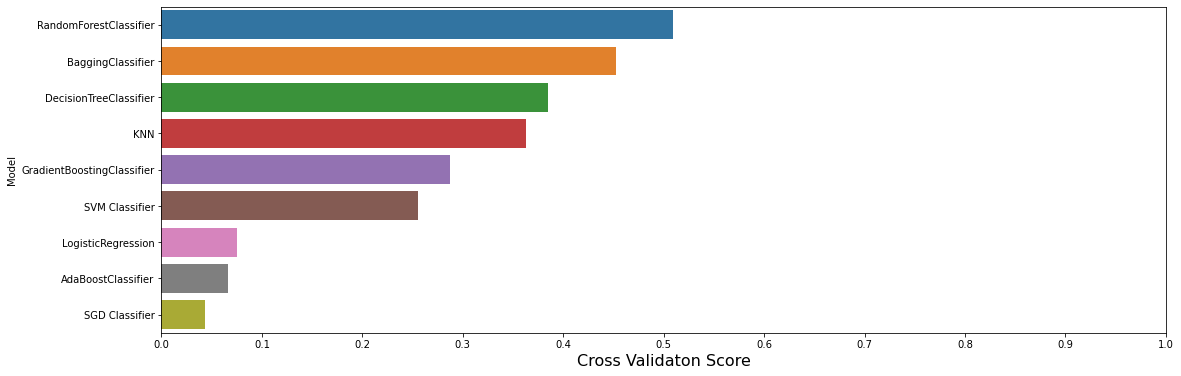

In [94]:
f, axe = plt.subplots(1,1, figsize=(18,6))

model_stats.sort_values(by=['Cross Validation Score'], ascending=False, inplace=True)

sns.barplot(x='Cross Validation Score', y='Model', data = model_stats, ax = axe)
axe.set_xlabel('Cross Validaton Score', size=16)
axe.set_ylabel('Model')
axe.set_xlim(0,1.0)
axe.set_xticks(np.arange(0, 1.1, 0.1))
plt.show()

10) Visualizing ROC Score for all Models

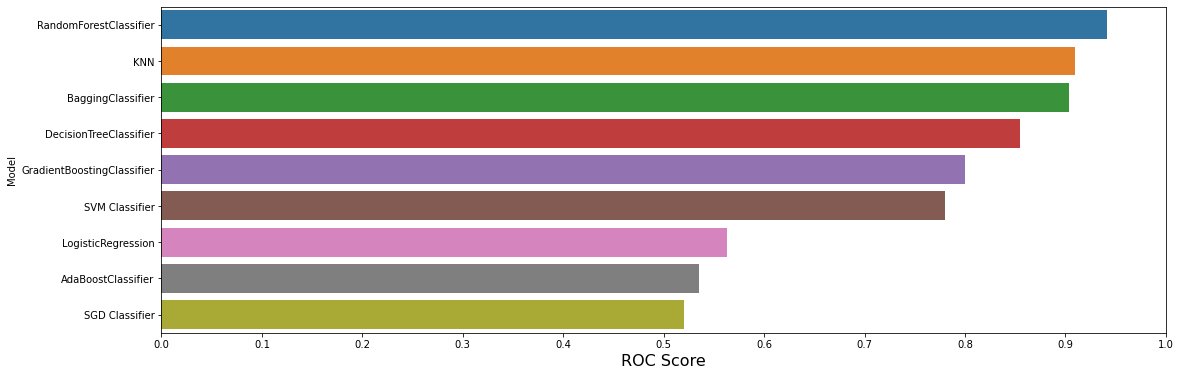

In [95]:
f, axe = plt.subplots(1,1, figsize=(18,6))

model_stats.sort_values(by=['ROC Score'], ascending=False, inplace=True)

sns.barplot(x='ROC Score', y='Model', data = model_stats, ax = axe)
axe.set_xlabel('ROC Score', size=16)
axe.set_ylabel('Model')
axe.set_xlim(0,1.0)
axe.set_xticks(np.arange(0, 1.1, 0.1))
plt.show()

Observation - Random Forest classifier is giving the highest accuracy and ROC score, so choosing this as the best classifier for this Study

11) Hyper Parameter Tuning with Random Forest Classifier

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {'criterion':['gini','entropy'],"max_depth":['auto',2,4,6,8,10],'n_estimators':[10,20,30,40,50]}
GCV = GridSearchCV(RandomForestClassifier(),parameters,cv=10,scoring='accuracy')
GCV.fit(x_train,y_train)
GCV.best_params_

In [97]:
GCV.best_estimator_
rfc = RandomForestClassifier(criterion = 'entropy', max_depth = 10, n_estimators = 50) 
reg_func(rfc, X, Y,'RandomForestClassifier','rfc')

Classification Report :
               precision    recall  f1-score   support

           0       0.75      0.78      0.76        68
           1       0.84      0.75      0.79        68
           2       0.76      0.93      0.83        68
           3       0.81      0.75      0.78        68
           4       0.66      0.70      0.68        67
           5       0.67      0.91      0.77        68
           6       0.77      0.72      0.74        67
           7       0.85      0.82      0.84        68
           8       0.84      0.68      0.75        68
           9       0.81      0.91      0.86        67
          10       0.81      0.74      0.77        68
          11       0.84      0.81      0.82        67
          12       0.65      0.75      0.70        68
          13       0.82      0.60      0.69        67
          14       0.65      0.78      0.71        67
          15       0.77      0.85      0.81        68
          16       0.80      0.84      0.82        68
  

12) Saving the Model

In [98]:
import pickle
filename = 'Avacado Study - Different Regions.pkl'
pickle.dump(rfc,open(filename,'wb'))

13) Conclusion

In [99]:
loaded_model = pickle.load(open('Avacado Study - Different Regions.pkl','rb'))
result = loaded_model.score(x_test, y_test)
print(result*100)

75.45877841687208


Accuracy Score is 76%

In [100]:
conclusion = pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,3641,3642,3643,3644,3645,3646,3647,3648,3649,3650
Predicted,28,53,51,17,40,36,53,29,3,38,...,10,4,6,39,36,14,29,29,7,14
Original,28,53,50,17,42,36,53,29,3,38,...,10,4,6,39,36,14,29,29,7,14


# Part-1 is 76% Accurate

# (PART-2) Taking Average Price as Target Variable

As Average Price is continuous type Numerical Data, it will be a Regression Problem

1) Separating Feature and Target Variables

In [101]:
#seperating Feature and Target Variable
X = df2.drop('AveragePrice', axis=1)
Y = df2['AveragePrice']

In [102]:
X.head()

,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,Month,region
0,1036.74,54454.85,48.16,8603.62,93.25,0.0,0,2015,12,0
1,674.28,44638.81,58.33,9408.07,97.49,0.0,0,2015,12,0
2,794.70,109149.67,130.50,8042.21,103.14,0.0,0,2015,12,0
3,1132.00,71976.41,72.58,5677.40,133.76,0.0,0,2015,12,0
4,941.48,43838.39,75.78,5986.26,197.69,0.0,0,2015,11,0


In [103]:
X.shape

(17053, 10)

In [104]:
Y.shape

(17053,)

2) Transforming Data (Power Transform)

In [105]:
from sklearn.preprocessing import power_transform

X = power_transform(X, method='yeo-johnson')
type(X)
X

array([[-7.16734932e-01,  4.79448577e-01, -2.34479885e-01, ...,
        -4.87054841e-13,  1.49135865e+00, -2.00289655e+00],
       [-8.38465631e-01,  3.68533947e-01, -1.84631895e-01, ...,
        -4.87054841e-13,  1.49135865e+00, -2.00289655e+00],
       [-7.92713607e-01,  9.00821083e-01,  2.84060946e-02, ...,
        -4.87054841e-13,  1.49135865e+00, -2.00289655e+00],
       ...,
       [-6.75888946e-01, -8.64627981e-01,  4.98248149e-01, ...,
         8.14792678e-13, -1.64714887e+00, -1.62989577e+00],
       [-6.01502738e-01, -8.00685793e-01,  4.97891998e-01, ...,
         8.14792678e-13, -1.64714887e+00, -1.52742338e+00],
       [-3.99356614e-01, -8.77526683e-01,  1.74702829e-01, ...,
         8.14792678e-13, -1.64714887e+00, -1.52742338e+00]])

In [106]:
X.mean()

-8.800013240634091e-17

In [107]:
X.std()

0.948683298050514

In [108]:
X.shape

(17053, 10)

Mean = 0, standard deviation = 0.94, so features are almost normalized

3) Feature Scaling using Standard Scaler

In [109]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X = pd.DataFrame(sc.fit_transform(X))
X

,0,1,2,3,4,5,6,7,8,9
0,-0.716735,0.479449,-0.234480,-0.419599,-0.863073,-0.670736,-1.034671,-1.207124,1.491359,-2.002897
1,-0.838466,0.368534,-0.184632,-0.376656,-0.853091,-0.670736,-1.034671,-1.207124,1.491359,-2.002897
2,-0.792714,0.900821,0.028406,-0.451420,-0.840338,-0.670736,-1.034671,-1.207124,1.491359,-2.002897
3,-0.691073,0.642083,-0.127341,-0.607763,-0.779951,-0.670736,-1.034671,-1.207124,1.491359,-2.002897
4,-0.744561,0.358637,-0.115982,-0.584804,-0.684305,-0.670736,-1.034671,-1.207124,1.272456,-2.002897
...,...,...,...,...,...,...,...,...,...,...
17048,-0.510879,-1.010359,-1.226786,-0.210766,-0.474188,-0.670736,0.966491,2.019268,-1.232283,-1.629896
17049,-0.675943,-0.753110,-1.226786,-0.401283,-0.553814,-0.670736,0.966491,2.019268,-1.647149,-1.629896
17050,-0.675889,-0.864628,0.498248,-0.379566,-1.028665,-0.670736,0.966491,2.019268,-1.647149,-1.629896
17051,-0.601503,-0.800686,0.497892,-0.303022,-0.995499,-0.670736,0.966491,2.019268,-1.647149,-1.527423


4) Plotting the distribution plot again

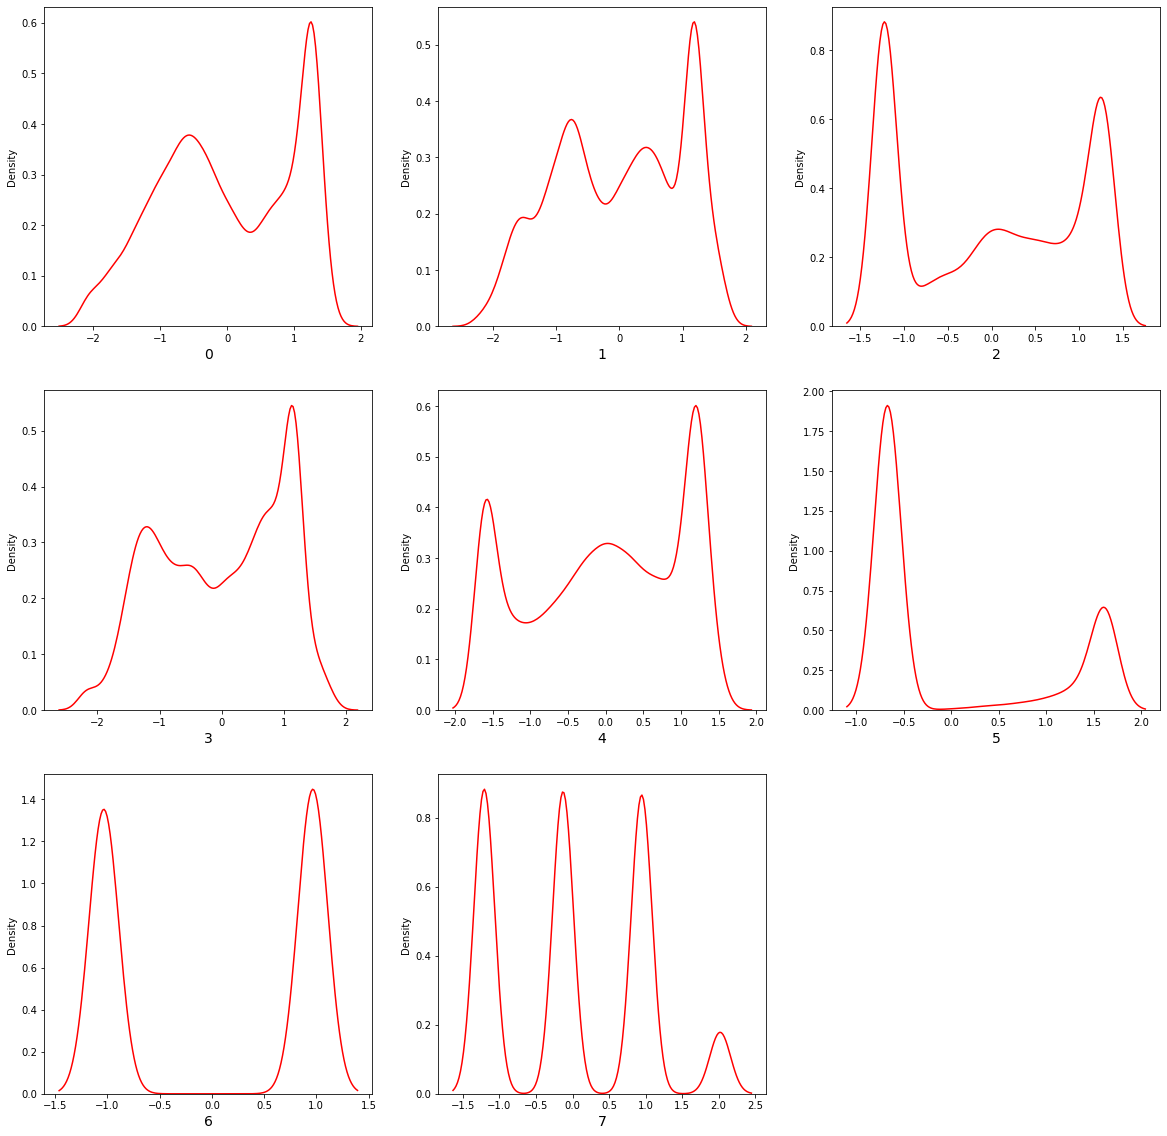

In [110]:
plt.figure(figsize=(20,20),facecolor='white')
plotnum=1
for col in X.columns:
    if plotnum<=8:
        plt.subplot(3,3,plotnum)
        sns.kdeplot(X[col], color = 'r')
        plt.xlabel(col,fontsize=14)
    plotnum+=1
plt.show()

5) Model Building - Will be training the following Regressor Models
- A. Linear Regression
- B. Random Forest Regressor
- C. Decision Tree Regressor
- D. K Neighbors Regressor
- E. SVR
- F. SGD Regressor

6) Importing necessary Libraries

In [111]:
#importing necessary libraries
from sklearn.linear_model import LinearRegression,Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import cross_val_score,train_test_split,KFold
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

7) Finding best Random State

In [112]:
#Choosing the best random state for our ML Model
maxAccu = 0
maxRS = 0
for i in range(1,100):
    x_train, x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.20,random_state = i)
    lr = RandomForestRegressor()
    lr.fit(x_train, y_train)
    
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    
    acc_test = r2_score(y_test,pred_test)
    
    if acc_test > maxAccu:
        maxAccu = acc_test
        maxRS = i
print('Test Accuracy is max:',maxAccu,'random_state is:',maxRS)

Test Accuracy is max: 0.8191257250526589 random_state is: 38


8) Creating the Training and Testing data set

In [113]:
x_train,x_test,y_train,y_test= train_test_split(X,Y,random_state=maxRS, shuffle = True, test_size=0.20)

#creating models empty dataframe
models_df = pd.DataFrame()

9) Regression Model

In [114]:
def reg_func1(model, X, Y, model_name,sc):    
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    
    
    #accracy score
    rs = r2_score(y_test,pred)
    print('R2 Score :',rs)
    
    #cross validation score
    cvs = cross_val_score(model,X,Y,cv=KFold(n_splits=10, shuffle = True)).mean()
    print('Cross validation score :',cvs)
    
    
    #difference in accuracy and cross validation score
    diff = abs(rs - cvs)
    print('R2 Score and CV Score Diff :', diff)  
    
    #mean square error
    mse = mean_squared_error(y_test, pred)
    print('Mean squared error:',mse)
    
    #mean absolute error
    mae = mean_absolute_error(y_test, pred)
    print('Mean Absolute error:',mae)
    
    #appending data to dataframe
    models_df[sc] = [model_name, rs, cvs, diff, mse, mae]
        
    plt.figure(figsize=(5,5))
    plt.scatter(x=y_test, y=pred, color='r')
    plt.plot(y_test,y_test, color='b')
    plt.xlabel('Actual Price', fontsize = 14)
    plt.ylabel('Predicted Price', fontsize = 14)
    plt.show()

A) Linear Regression

R2 Score : 0.38421284748706674
Cross validation score : 0.36112800982572907
R2 Score and CV Score Diff : 0.023084837661337676
Mean squared error: 0.0947750109002745
Mean Absolute error: 0.24087977904622776


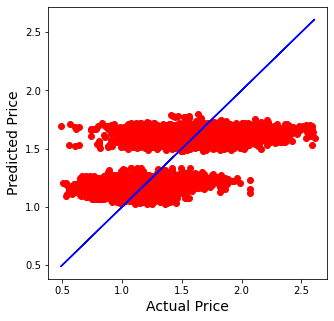

In [115]:
reg_func1(LinearRegression(),X,Y, 'LinearRegression','lr')

B. Random Forest Regressor

R2 Score : 0.8166872326493615
Cross validation score : 0.8063598327221083
R2 Score and CV Score Diff : 0.010327399927253178
Mean squared error: 0.028213432925512937
Mean Absolute error: 0.12271711408172269


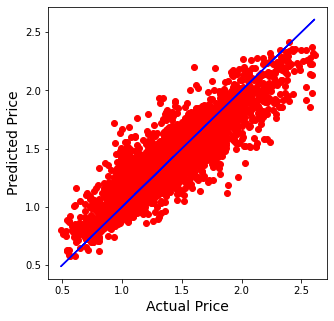

In [116]:
reg_func1(RandomForestRegressor(),X,Y, 'RandomForestRegressor','rfr')

C. Decision Tree Regressor

R2 Score : 0.6375377187694464
Cross validation score : 0.63058685967133
R2 Score and CV Score Diff : 0.006950859098116435
Mean squared error: 0.05578610484869214
Mean Absolute error: 0.15977127919476203


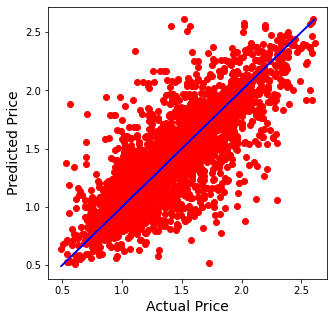

In [117]:
reg_func1(DecisionTreeRegressor(),X,Y, 'DecisionTreeRegressor','dtr')

D) K Neighbors Regressor

R2 Score : 0.7787125741631391
Cross validation score : 0.7666699298920524
R2 Score and CV Score Diff : 0.0120426442710867
Mean squared error: 0.034058063910876575
Mean Absolute error: 0.1317654646731164


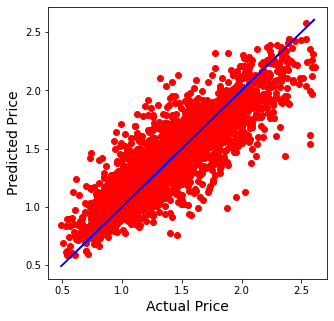

In [118]:
reg_func1(KNN(),X,Y, 'KNN','knn')

E. SVR

R2 Score : 0.5628773131640961
Cross validation score : 0.5348046724026388
R2 Score and CV Score Diff : 0.028072640761457213
Mean squared error: 0.0672769921239303
Mean Absolute error: 0.19550359830505049


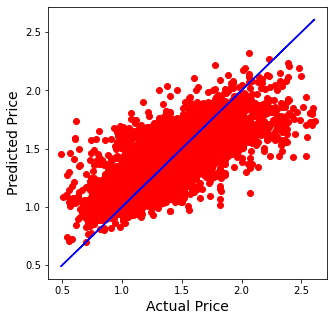

In [119]:
reg_func1(SVR(),X,Y, 'SVR','svr')

F) SGD Regressor

R2 Score : 0.38340484623549276
Cross validation score : 0.3593913882036205
R2 Score and CV Score Diff : 0.02401345803187227
Mean squared error: 0.09489936933664793
Mean Absolute error: 0.24124168911979757


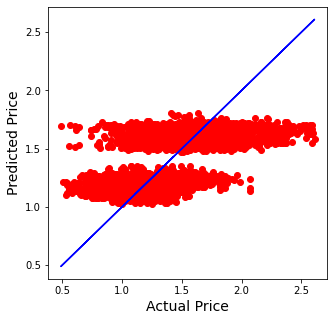

In [120]:
reg_func1(SGDRegressor(),X,Y, 'SGDRegressor','sgd')

In [121]:
model_stats = models_df.transpose()
model_stats

,0,1,2,3,4,5
lr,LinearRegression,0.384213,0.361128,0.023085,0.094775,0.24088
rfr,RandomForestRegressor,0.816687,0.80636,0.010327,0.028213,0.122717
dtr,DecisionTreeRegressor,0.637538,0.630587,0.006951,0.055786,0.159771
knn,KNN,0.778713,0.76667,0.012043,0.034058,0.131765
svr,SVR,0.562877,0.534805,0.028073,0.067277,0.195504
sgd,SGDRegressor,0.383405,0.359391,0.024013,0.094899,0.241242


In [122]:
model_stats.columns = ['Model','R2 Score', 'Cross Validation Score', 'Difference','Mean Sq Error','Mean Abs Error']
model_stats

,Model,R2 Score,Cross Validation Score,Difference,Mean Sq Error,Mean Abs Error
lr,LinearRegression,0.384213,0.361128,0.023085,0.094775,0.24088
rfr,RandomForestRegressor,0.816687,0.80636,0.010327,0.028213,0.122717
dtr,DecisionTreeRegressor,0.637538,0.630587,0.006951,0.055786,0.159771
knn,KNN,0.778713,0.76667,0.012043,0.034058,0.131765
svr,SVR,0.562877,0.534805,0.028073,0.067277,0.195504
sgd,SGDRegressor,0.383405,0.359391,0.024013,0.094899,0.241242


10) Visualizing R2 Score for all Regression Models

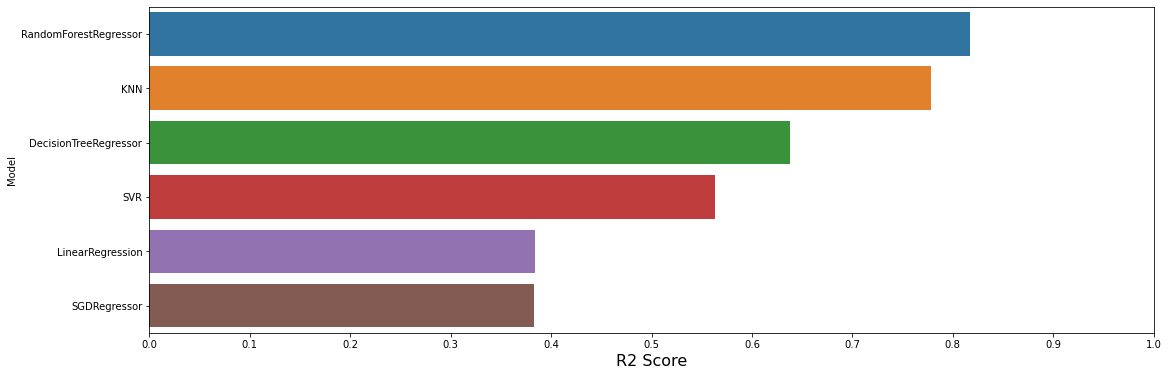

In [123]:
f, axe = plt.subplots(1,1, figsize=(18,6))

model_stats.sort_values(by=['R2 Score'], ascending=False, inplace=True)

sns.barplot(x='R2 Score', y='Model', data = model_stats, ax = axe)
axe.set_xlabel('R2 Score', size=16)
axe.set_ylabel('Model')
axe.set_xlim(0,1.0)
axe.set_xticks(np.arange(0, 1.1, 0.1))
plt.show()

11) Visualizing Cross Validation Score for all Regression Models

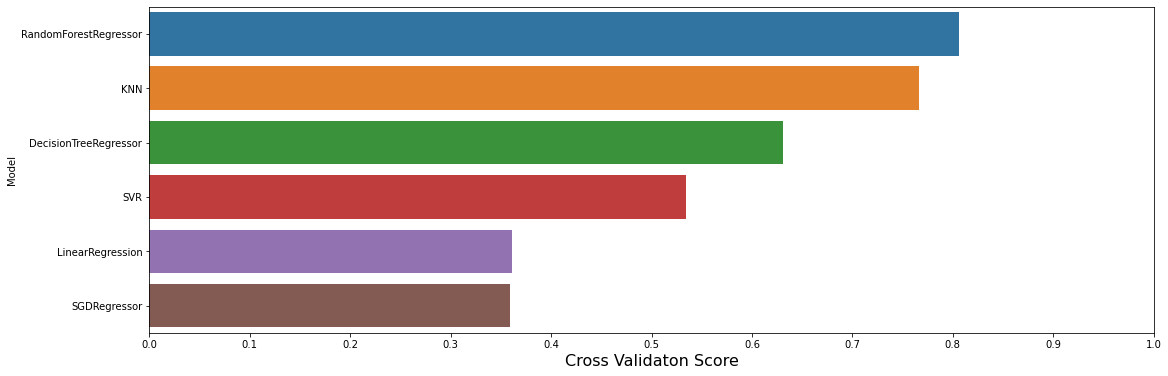

In [124]:
f, axe = plt.subplots(1,1, figsize=(18,6))

model_stats.sort_values(by=['Cross Validation Score'], ascending=False, inplace=True)

sns.barplot(x='Cross Validation Score', y='Model', data = model_stats, ax = axe)
axe.set_xlabel('Cross Validaton Score', size=16)
axe.set_ylabel('Model')
axe.set_xlim(0,1.0)
axe.set_xticks(np.arange(0, 1.1, 0.1))
plt.show()

12) Visualizing Mean Square Error for all Regression Models

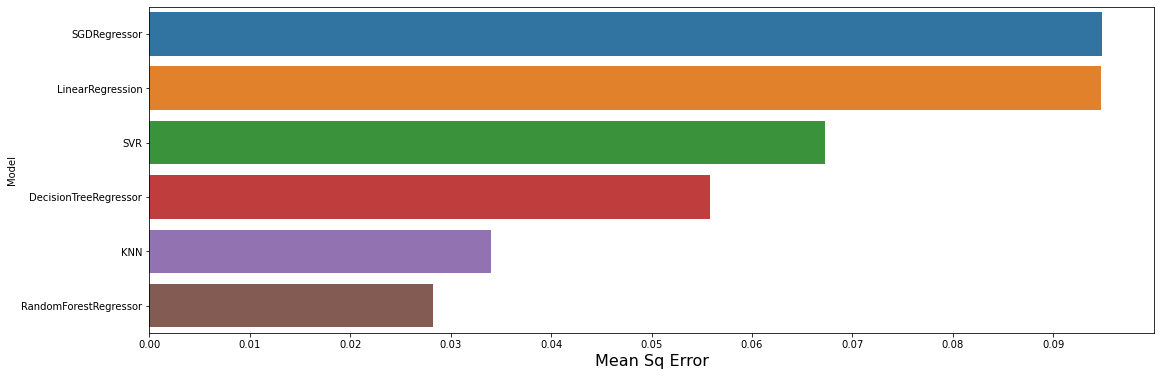

In [125]:
f, axe = plt.subplots(1,1, figsize=(18,6))

model_stats.sort_values(by=['Mean Sq Error'], ascending=False, inplace=True)

sns.barplot(x='Mean Sq Error', y='Model', data = model_stats, ax = axe)
axe.set_xlabel('Mean Sq Error', size=16)
axe.set_ylabel('Model')
axe.set_xlim(0,0.1)
axe.set_xticks(np.arange(0, 0.1, 0.01))
plt.show()

Observation - Random Forest Regressor is the best fit model with max accuracy 81.8% and least mean square error 0.027%

13) Hyper Parameter Tuning with Random Forest Regressor

In [130]:
from sklearn.model_selection import GridSearchCV
# Random Forest Regressor
parameters =  {'warm_start':['True','False'],
               'n_estimators':[100,200,300],
               'criterion':['squared_error', 'absolute_error']}
GCV = GridSearchCV(RandomForestRegressor(),parameters, cv=10, n_jobs=-1,scoring="r2")
GCV.fit(x_train,y_train)
GCV.best_params_

{'criterion': 'squared_error', 'n_estimators': 300, 'warm_start': 'False'}

R2 Score : 0.8202010730510012
Cross validation score : 0.807947086052018
R2 Score and CV Score Diff : 0.012253986998983168
Mean squared error: 0.02767262225577388
Mean Absolute error: 0.12126391943911222


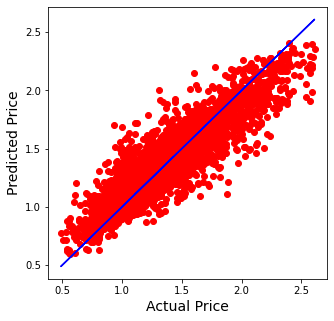

In [132]:
GCV.best_estimator_
rfr = RandomForestRegressor(  warm_start = 'False', n_estimators = 300 ,criterion = 'squared_error') 
reg_func1(rfr, X, Y,'Random Forest Regressor','rfr')

14) Saving the Model

In [133]:
import pickle
filename = 'Avacado Study - Average Price.pkl'
pickle.dump(rfr,open(filename,'wb'))

15) Conclusion

In [134]:
loaded_model = pickle.load(open('Avacado Study - Average Price.pkl','rb'))
result = loaded_model.score(x_test, y_test)
print(result*100)

82.02010730510013


In [135]:
conclusion = pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,3401,3402,3403,3404,3405,3406,3407,3408,3409,3410
Predicted,1.061033,1.6783,1.172057,1.0746,1.970633,1.670633,1.229633,1.575233,1.133,1.352933,...,1.512667,1.121133,1.4805,1.5698,1.704397,1.440933,1.680833,1.0005,1.176067,1.440665
Original,1.110000,1.8000,1.260000,1.1400,1.980000,1.970000,1.120000,1.500000,1.090,1.310000,...,2.020000,1.040000,1.6900,1.0800,1.800000,1.400000,1.590000,0.9600,1.100000,1.430000


# Part-2 is 82.02% accurate

Observation - Training the model as per the Region as Target is giving 76% accuracy and traing model giving Average Price as target is giving 82% accuracy.